# **Project Name**    - NYC Taxi Trip Time Prediction(ML-Regression)



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Prasanta Kumar Sahoo
##### **Team Member 2 -** Kartikeshwara Behera


# **Project Summary -**

  The recent rapid developments in technology have caused the transportation sector to change considerably. The need for transportation has grown significantly as a result of the world's population surpassing 7 billion. The need for mobility has joined the three fundamental needs of food, water, and shelter, which has prompted the development of more effective forms of transit like internet- and app-based systems.

  New York City is one of the places that has embraced this technology and made significant advancements in transportation. With a comprehensive network of subways, buses, and taxi services, New York City is one of the most technologically sophisticated cities in the world when it comes to transit. There are more than 10,000 taxis in the metropolis, and more than 100 million taxi journeys take place annually. It's interesting to note that almost 50% of city residents don't own a personal car, which means that many depend heavily on cabs as their main form of transportation.

  With the advent of app-based services like Uber and Lyft, the cab business in New York City has experienced major changes in recent years. These services have simplified the processes for booking, tracking, and paying for taxis. The rivalry in the cab industry has grown as a result of the app-based services, leading to better services and reduced costs for consumers.A great illustration of how technology can transform transportation and make it more effective, cheap, and available to everyone is New York City. The introduction of app-based services has made it simpler and more practical for people to get around the city, and the city's taxi business has adjusted to these changes.




# **GitHub Link -**

https://github.com/prasantsahoo107

# **Problem Statement**


**The main objective is to develop a prediction algorithm that will help determine and predict the trip duration of taxi. As a result, this would make it easier to quickly and effectively match the right cabs with the right clients.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#Install Library  use to calculate the haversine distance 

!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import Libraries
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from haversine import haversine
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#import the data from a csv file.
path ="/content/drive/MyDrive/AlmaBetter Project/NYC Taxi Data.csv"
nyc_df =  pd.read_csv(path)

### Dataset First View

In [5]:
# Dataset First Look
nyc_df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

### Dataset Rows & Columns count

In [6]:
pip freeze > requirement.txt

In [7]:
# Dataset Rows & Columns count
nyc_df.shape

(1458644, 11)

There are 1458644 rows and 11 columns

### Dataset Information

In [8]:
# Dataset Info
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [9]:
# checking data-types of variables to identify the numerical and categorical variables
nyc_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Pasenger count varies from 0 to 9.
Trip duration has max value of 3526282 seconds almost 979.5 hours and minimum 1 second. This definetly has outliers present so we'll remove them

#### Duplicate Values

In [10]:
#checking whether there is duplicates or not
len(nyc_df[nyc_df.duplicated()])

0

#### Missing Values/Null Values

In [11]:
#checking whether there is null values or not
nyc_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### What did you know about your dataset?

There are approx 1.5 million records in our dataset.
There is no NULL record in the dataset, So we dont have to impute any record.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
nyc_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [13]:
# Dataset Describe
nyc_df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01      4.073588e+01   3.970000e+02  
50%        -7.397975e+01      4.075452e+01   6.620000e+02  
75%        -7.396301e+01      4.076981e+01   1.075000e+03  
max        -6.133553e+01      4.392103e+01   3.526282e+06

### Variables Description 

### Feature details:
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.
- Categorizing the features :

- Let's divide features into categories:

- Geographical: pickup_longitude , pickup_latitude , dropoff_longitude , dropoff_latitude

- Time related: pickup_datetime, dropoff_datetime

- Identifier: id(not useful for analysis)

- Others: vendor_id, passenger_count, store_and_fwd_flag


### Label details:
- trip_duration - duration of the trip in seconds 




### Check Unique Values for each variable.

In [14]:
#The nunique () method returns the number of unique values for each column
nyc_df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
nyc_df['passenger_count'].value_counts().reset_index()

index  passenger_count
0      1          1033540
1      2           210318
2      5            78088
3      3            59896
4      6            48333
5      4            28404
6      0               60
7      7                3
8      9                1
9      8                1

In [16]:
nyc_df[nyc_df['passenger_count']==0].count()

id                    60
vendor_id             60
pickup_datetime       60
dropoff_datetime      60
passenger_count       60
pickup_longitude      60
pickup_latitude       60
dropoff_longitude     60
dropoff_latitude      60
store_and_fwd_flag    60
trip_duration         60
dtype: int64

In [17]:
nyc_df=nyc_df[nyc_df['passenger_count']!=0]

In [18]:
nyc_df["pickup_datetime"][0]

'2016-03-14 17:24:55'

In [19]:
#Convert timestamp to datetime format to fetch the other details as listed below
nyc_df['pickup_datetime']=pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime']=pd.to_datetime(nyc_df['dropoff_datetime'])
nyc_df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

### What all manipulations have you done and insights you found?

The data wrangling converts the 'pickup_datetime' and 'dropoff_datetime' columns in the 'nyc_df' DataFrame from string format to datetime format using the 'pd.to_datetime' method. This conversion enables the extraction of various details such as day, month, year, hour, minute, and second from the datetime object.

The reason for converting the columns to datetime format is to facilitate time-based analysis of the taxi rides data contained in the 'nyc_df' DataFrame. With the datetime format, various time-related calculations and operations can be performed on the data, such as determining the time duration of the taxi rides, identifying the busiest hours, days, and months for taxi rides, and identifying patterns and trends in the data based on time.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

[Text(0.5, 1.0, 'Distribution Plot for Trip Duration')]

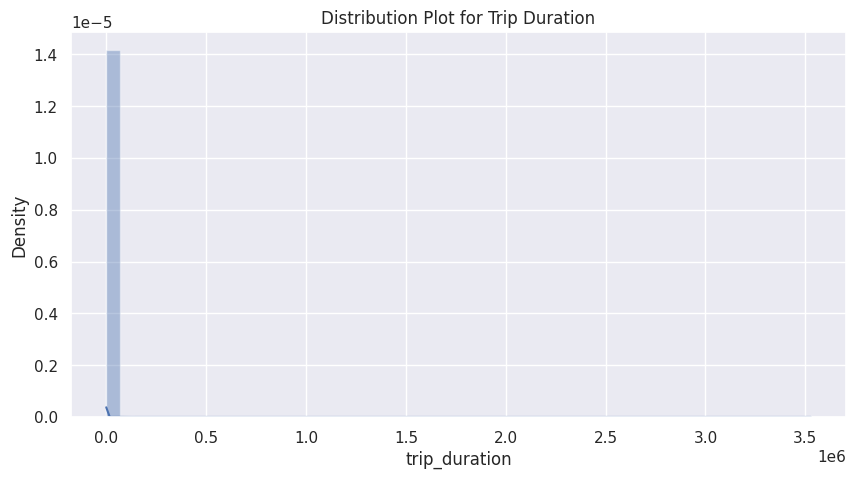

In [20]:
# Chart - 1 visualization code
#Dependent variable 'trip_duration'
plt.figure(figsize=(10,5))
sns.distplot(nyc_df['trip_duration'],color="b").set(title='Distribution Plot for Trip Duration')

##### 1. Why did you pick the specific chart?

The distribution plot is a good chart type for this analysis as it enables us to visualize the shape of the distribution, which can provide useful information about the underlying data. Additionally, the plot allows us to quickly identify any skewness, kurtosis, or multimodality in the data, which can inform subsequent analysis and modeling efforts. The choice of the seaborn library's 'distplot' function is also appropriate as it combines both a histogram and a density plot in one visualization, providing a clearer picture of the distribution.

##### 2. What is/are the insight(s) found from the chart?

The distribution plot provides insights into the central tendency and spread of the trip duration variable. It shows the shape of the distribution of trip durations and highlights any outliers or anomalies in the data. From the plot, we can determine the range of trip durations, the most common trip durations, and the frequency of extreme or unusual trip durations.

#### Chart - 2

[Text(0.5, 1.0, 'Distribution Plot with Log Transformation for Trip Duration')]

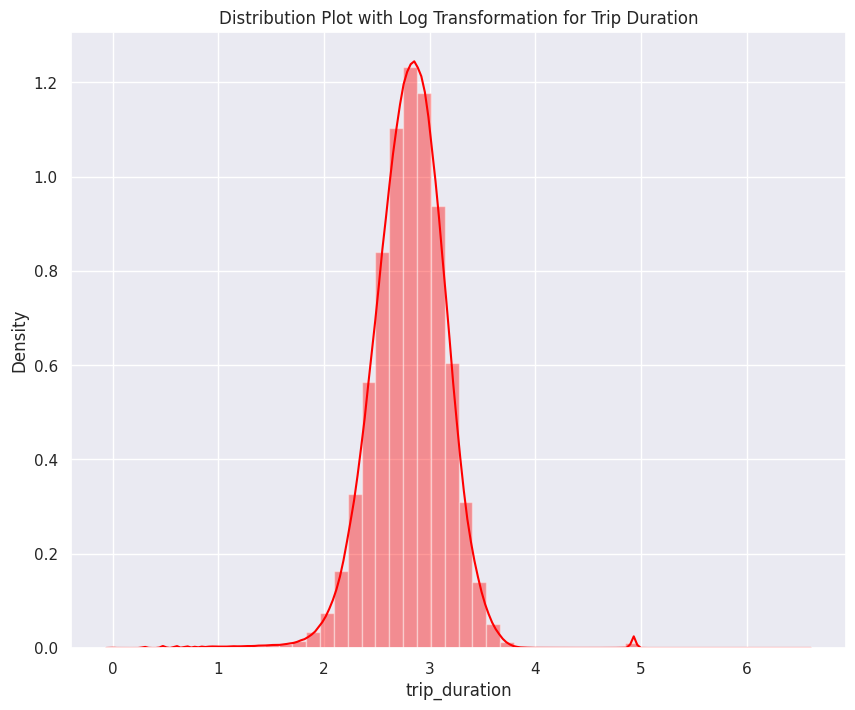

In [21]:
  plt.figure(figsize=(10,8))
  sns.distplot(np.log10(nyc_df['trip_duration']), color=(1, 0, 0)).set(title='Distribution Plot with Log Transformation for Trip Duration')


##### 1. Why did you pick the specific chart?

The choice of the distribution plot is appropriate in this case as it helps to visualize the distribution of the 'trip_duration' column after applying the logarithmic transformation. The plot is ideal for continuous data with a large number of observations, and it provides a more informative view of the data than a simple histogram.

##### 2. What is/are the insight(s) found from the chart?

The distribution plot provides insights into the distribution of the 'trip_duration' column after the logarithmic transformation. It shows the frequency distribution of the logarithmic values of trip duration values on the x-axis and the density estimate on the y-axis. The plot can help to identify the central tendency, dispersion, and skewness of the distribution. For instance, the plot may show that the distribution is skewed to the right or left, indicating that a significant portion of the trip durations are shorter or longer than the average. It may also reveal the presence of outliers in the data.

#### Chart - 3

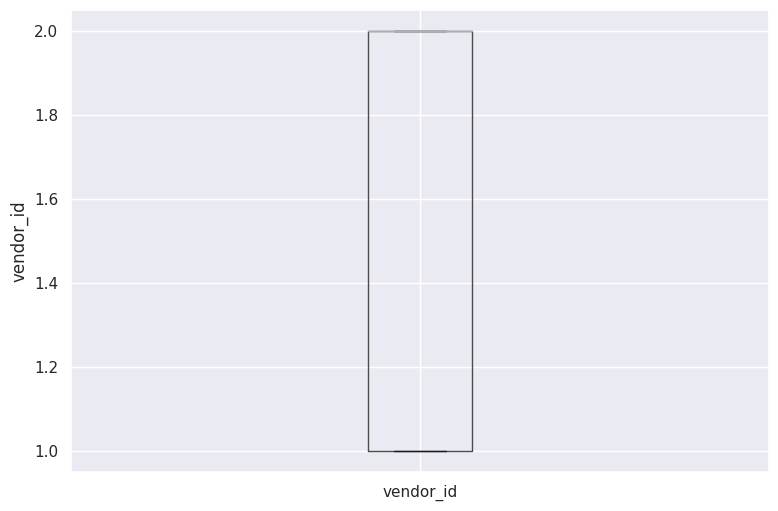

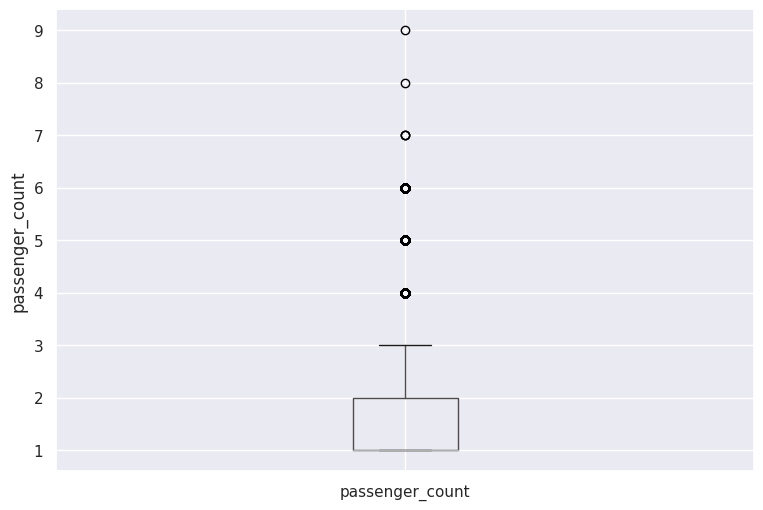

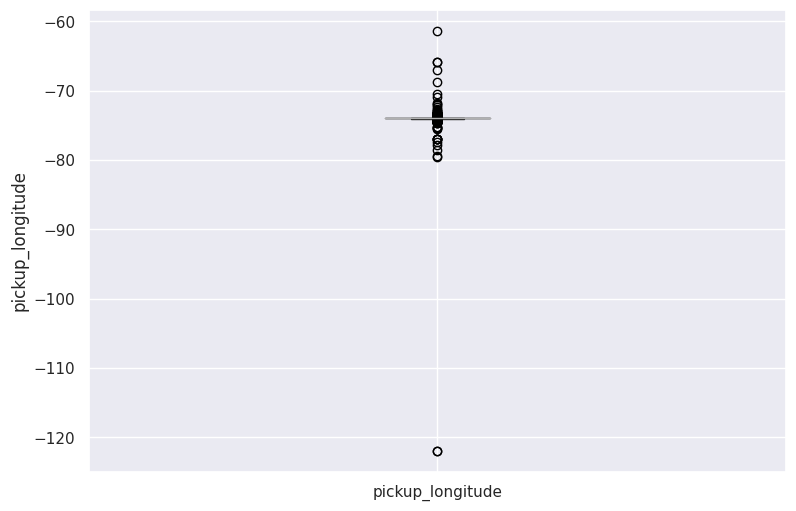

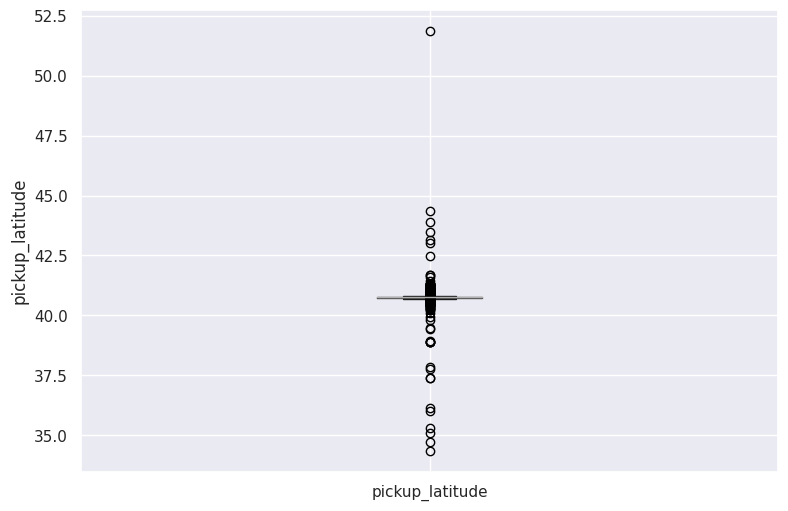

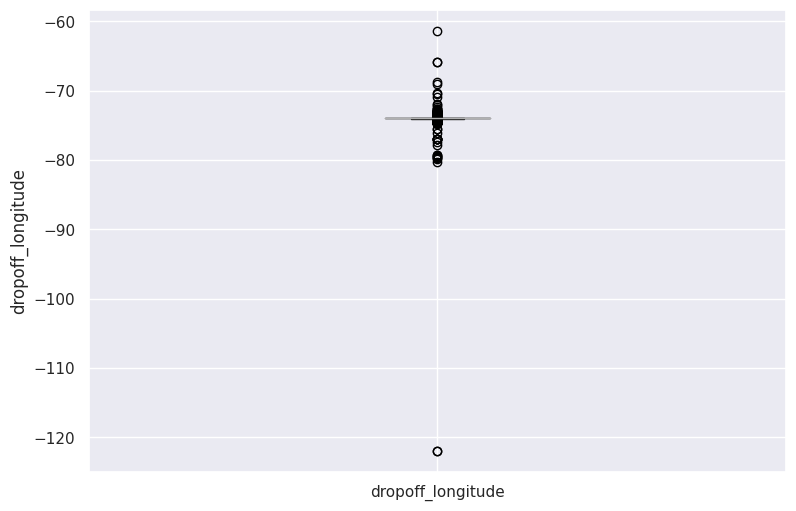

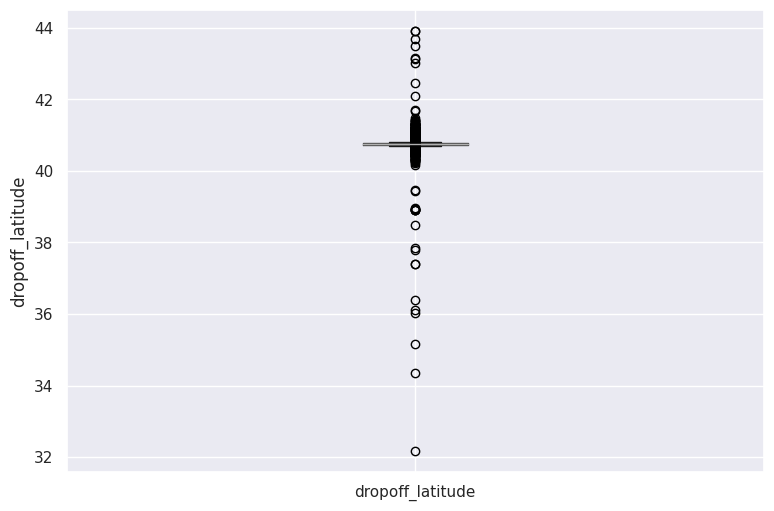

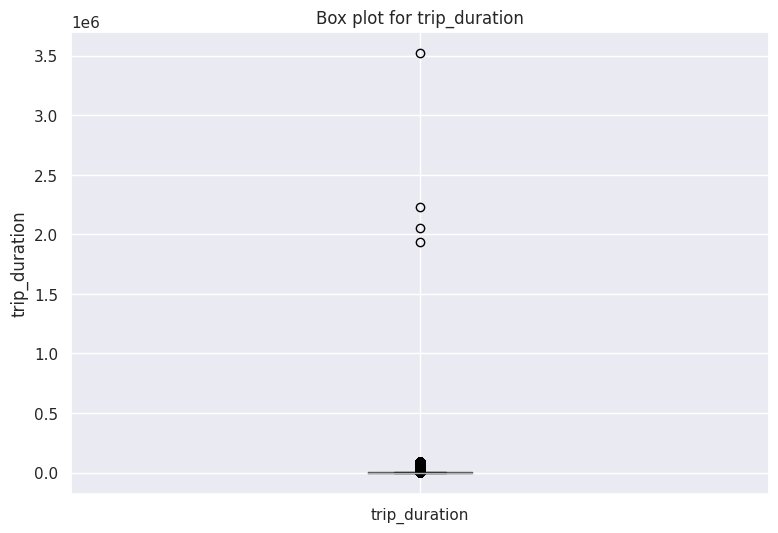

In [22]:
# Chart - 3 visualization code
# plot a boxplot for the label by each numerical feature  
for col in nyc_df.describe().columns:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  nyc_df.boxplot(column = col, ax = ax)
  ax.set_ylabel(col)
plt.title("Box plot for trip_duration")
plt.show()

##### 1. Why did you pick the specific chart?

In this case, the boxplot is appropriate for visualizing the distribution of the 'trip_duration' feature, along with other numerical features in the dataset. The boxplot allows us to quickly compare the distribution of each feature and identify any potential outliers that may need to be addressed in the data cleaning or modeling process.

The boxplot is particularly useful for comparing the distribution of different numerical features in a dataset and identifying any differences in their central tendency, spread, and skewness. It can also be used to detect any potential outliers that may affect the statistical analysis of the data.

##### 2. What is/are the insight(s) found from the chart?

The boxplot can provide several insights into the distribution of each numerical feature in the dataset, such as the range of values, the presence of outliers, and the overall shape of the distribution. Specifically, the boxplot shows the following information for each feature:

The median value (the horizontal line inside the box) and the interquartile range (IQR, the length of the box) which represents the central 50% of the data.
The whiskers, which represent the maximum and minimum values of the data within 1.5 times the IQR from the upper and lower quartiles, respectively.
Any points that fall outside of the whiskers, which are considered outliers.

Vendor ID has no outlier.

In passenger count 4 and more passengers are being treated as outliers.

pickup_longitude and pickup_latitude has outliers as well.

dropoff_longitude and dropoff_latitude has outliers too.

Our target variable trip_duration has alot of outliers

Checking consitency of trip_duration

from the box plot we see that there are few outlier having very large value. we have to remove those outlier. but first let check the consitency of feature "trip duration". To do so we calculate the difference between pick and dropoff time.

#### Chart - 4

In [23]:

# creating a function that will out trip duration from pick and dropoff time
def calculate_trip_duration(pickup,dropoff):
    return (dropoff-pickup).total_seconds()

In [24]:
# creating a feature which stores this calculated trip duration
nyc_df['calculate_trip_duration']=nyc_df.apply(lambda x: calculate_trip_duration(x['pickup_datetime'],x['dropoff_datetime']),axis=1)

In [25]:
# checking for consistency by comparing trip duration with calculated trip duration
(nyc_df['calculate_trip_duration']==nyc_df['trip_duration']).value_counts()

True    1458584
dtype: int64

Here, we see that there the trip duration is consistent with the calculated trip duration. so, this large value are purely an outlier.

In [26]:
# Dropping the feature created 
nyc_df.drop(['calculate_trip_duration'],axis=1,inplace=True)

To checked for outlier we segregate our dependent variable into different categories i.e trip whose duration is less then 1min, within 10mins,within hour,within day, within two day and more than two day

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'less then 1min'),
  Text(1, 0, 'within 10 mins'),
  Text(2, 0, 'within 30 mins'),
  Text(3, 0, 'within hour'),
  Text(4, 0, 'within day'),
  Text(5, 0, 'within two days'),
  Text(6, 0, 'more then two day')])

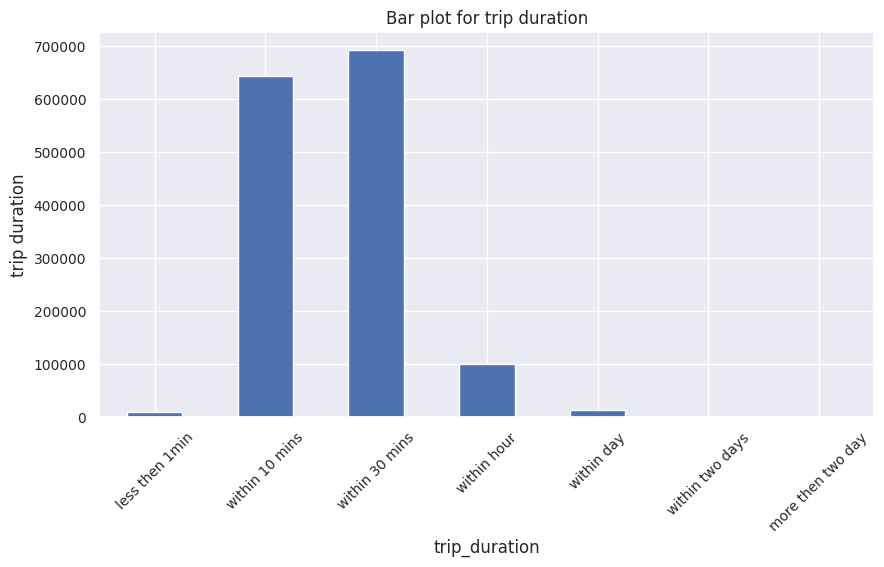

In [27]:
# segregrating the dependent variable into different categories.
plt.figure(figsize=[10,5])
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']
nyc_df.groupby(pd.cut(nyc_df['trip_duration'],bins=[0,60,600,1800,3600,86400,86400*2,10000000],labels=labels))['trip_duration'].count().plot(kind='bar',fontsize=10)
plt.title("Bar plot for trip duration")
plt.ylabel("trip counts")
plt.ylabel("trip duration")
plt.xticks(rotation=45)

##### 1. Why did you pick the specific chart?

The bar plot is an appropriate chart type for visualizing the count of categorical data, as it allows for easy comparison of the count of different categories. In this case, the bar plot is useful for understanding the distribution of trip duration in the dataset, which can help in designing appropriate analytical models for predicting trip duration or identifying any anomalies in the data.

##### 2. What is/are the insight(s) found from the chart?

This bar plot provides insights into the distribution of trip duration in the dataset, by categorizing the trips into different time duration categories. The plot shows the count of trips falling under each category, which can give an idea of the most common trip duration intervals in the dataset.

#### Chart - 5

In [28]:
numeric_features = nyc_df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

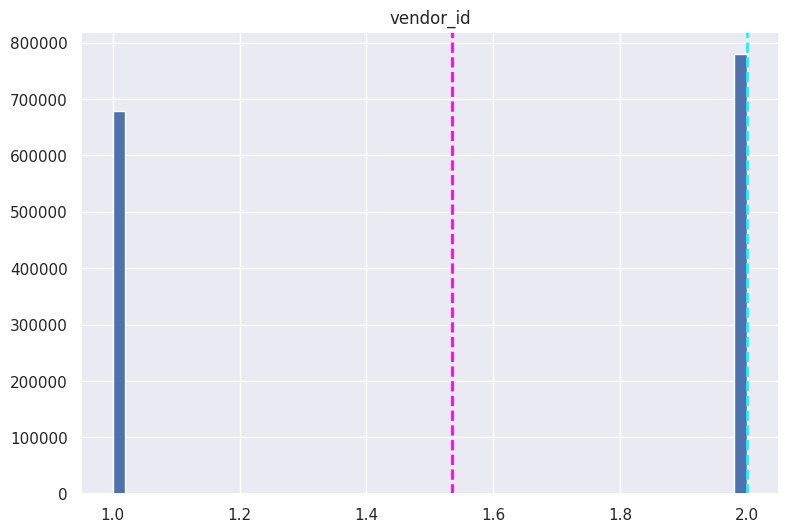

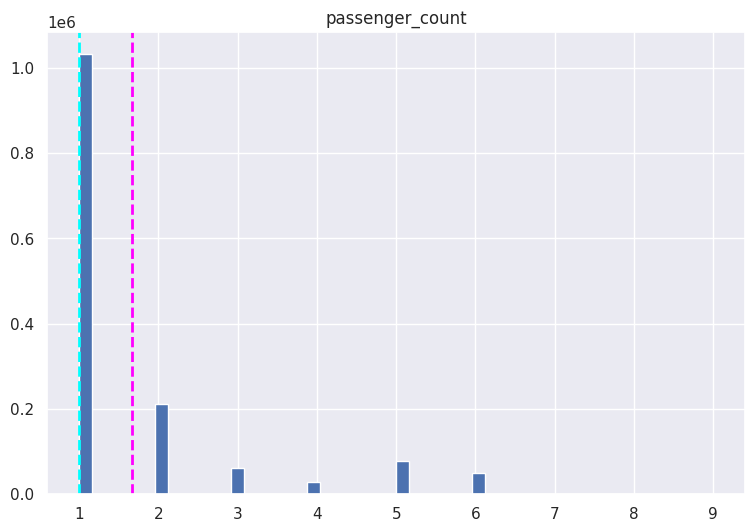

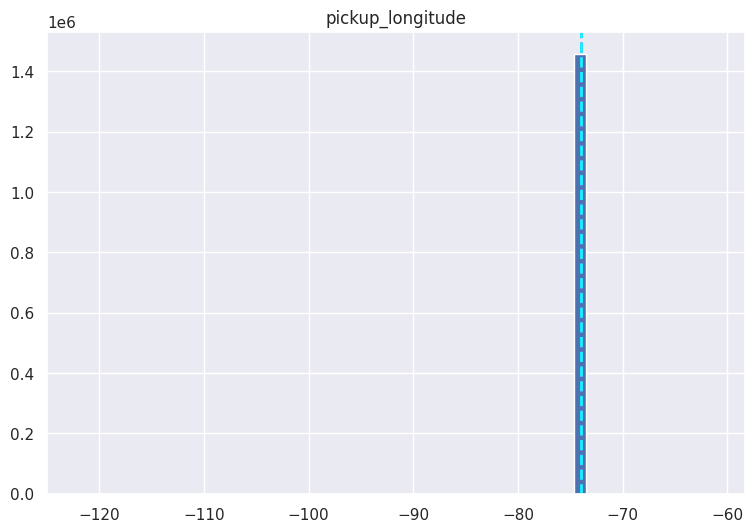

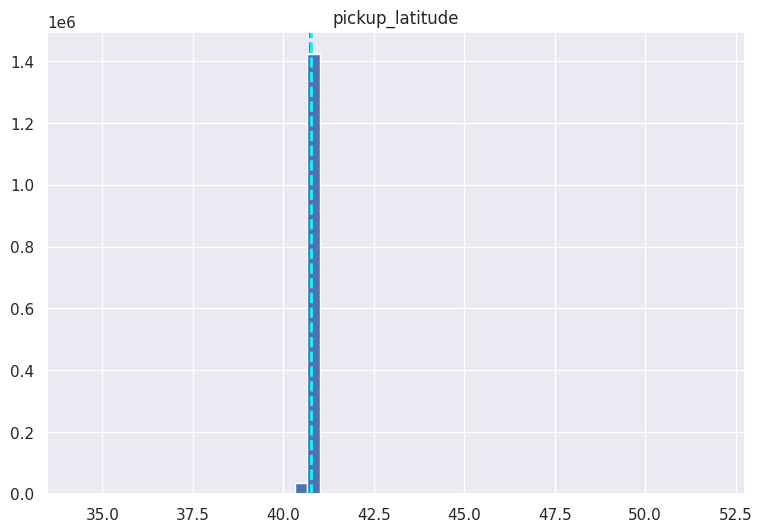

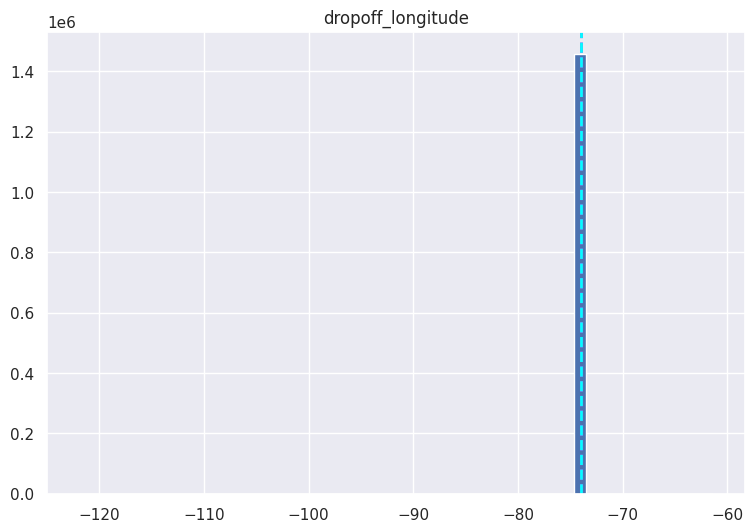

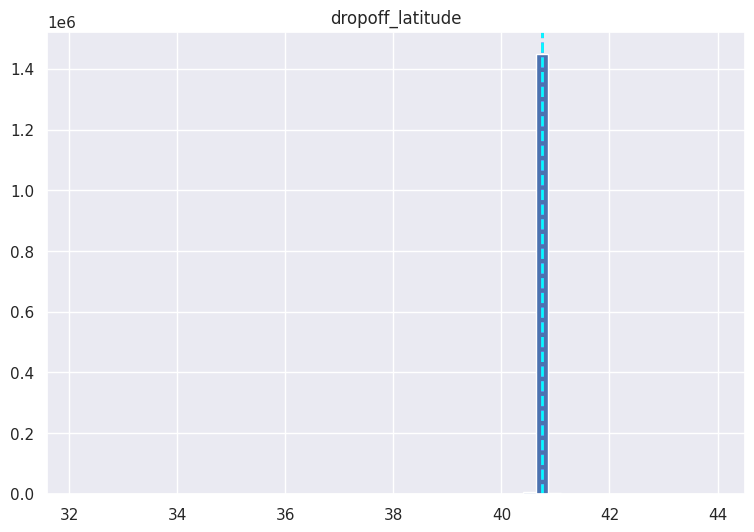

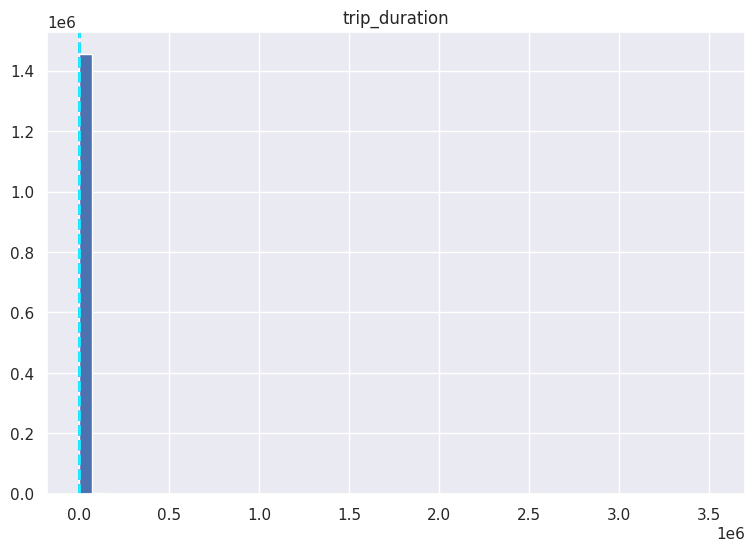

In [29]:
# Chart - 5 visualization code
# plot a bar plot for each numerical feature count
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = nyc_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are a suitable chart type for visualizing the distribution of continuous numerical data. They allow us to visualize the spread of values, the shape of the distribution, and any potential outliers or unusual patterns in the data. The mean and median lines provide additional insights into the central tendency of the data. Overall, this code helps in understanding the distribution of numerical features in the dataset, which is useful for data exploration and identifying any issues or anomalies in the data.

##### 2. What is/are the insight(s) found from the chart?

The histograms provide insights into the distribution of values for each numerical feature in the dataset. By looking at the shape of each histogram, one can understand if the distribution is symmetric or skewed, and whether there are any outliers or unusual patterns in the data. The mean and median lines can give an idea of the central tendency of the data and whether they are close to each other or not.

#### Chart - 6

In [30]:
nyc_df.describe().columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

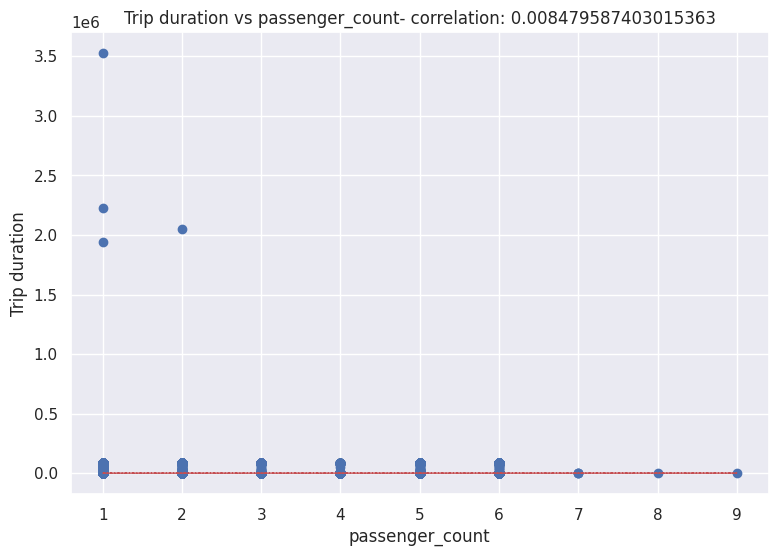

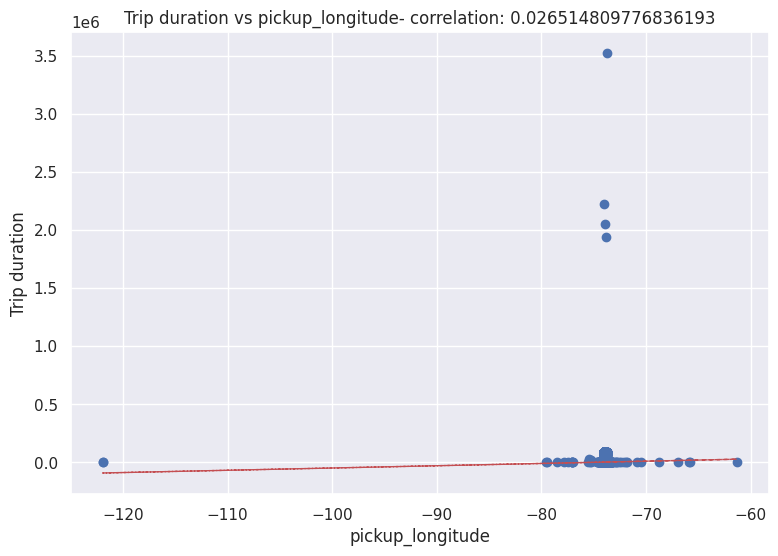

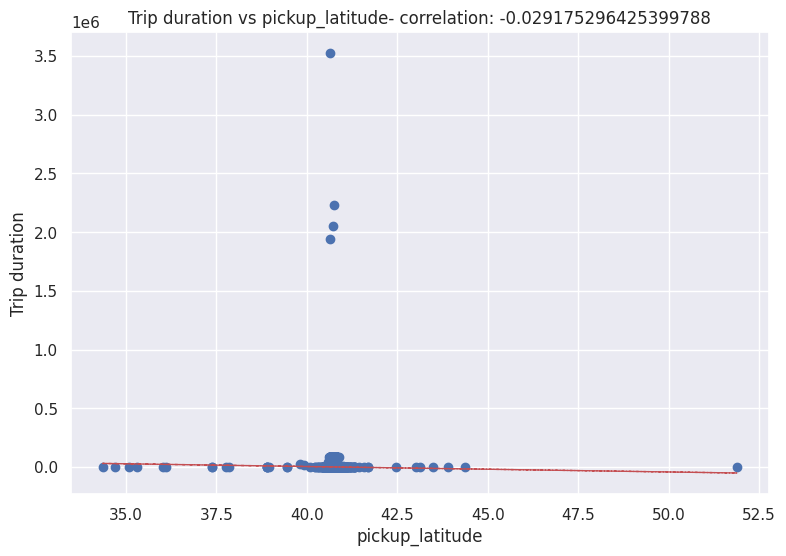

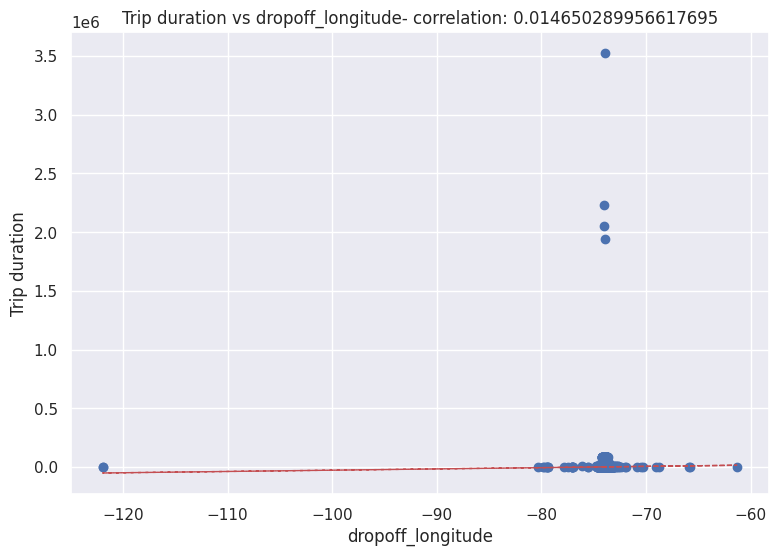

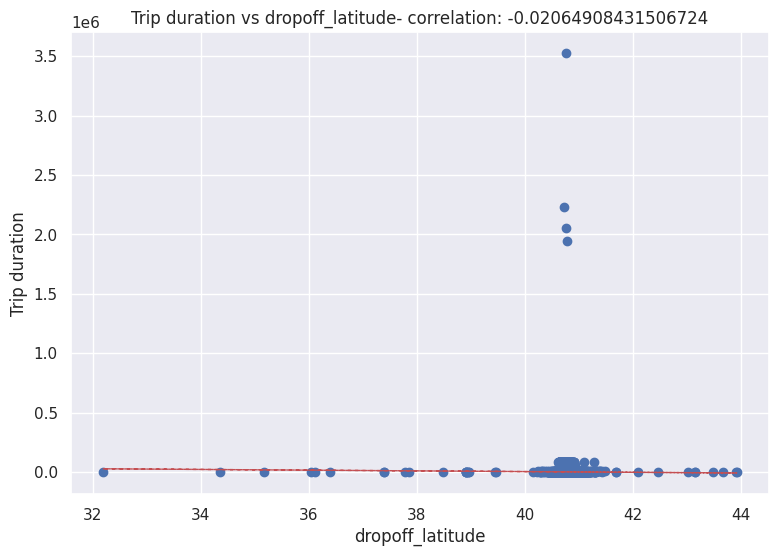

In [31]:
# Chart - 6 visualization code

for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = nyc_df[col]
    label = nyc_df['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Trip duration')
    ax.set_title('Trip duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(nyc_df[col], nyc_df['trip_duration'], 1)
    y_hat = np.poly1d(z)(nyc_df[col])

    plt.plot(nyc_df[col], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

This particular chart type is best to identify any linear relationships between two variables and to see if there is a pattern in the data. It helps to determine if there is a correlation between two variables, whether it is positive or negative and also to identify any outliers in the data.

#### Chart - 7

**Map Visualization**

Our aim is to plot the taxi pickup locations on a map of the US by marking the longitude and latitude. This visualization will help us answer the following questions:

 - Are all the pickups limited to the vicinity of NYC and its surrounding areas?

 - Are there any unusual locations for pickups?

 - Are the latitude and longitude values confined only to the land area of the US and not elsewhere?

(-74.03, -73.75)

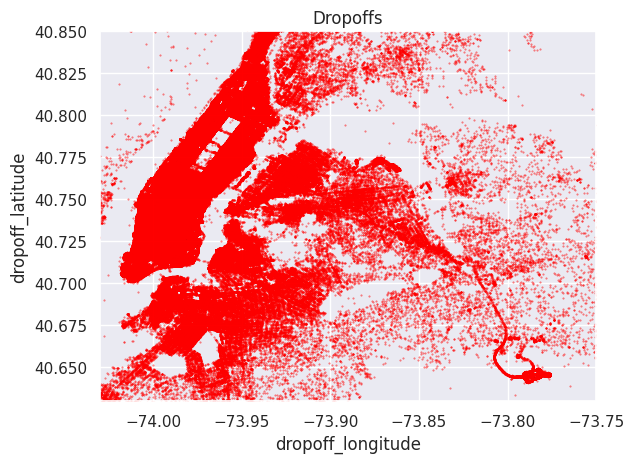

In [32]:
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63,40.85]

nyc_df.plot(kind='scatter', x='dropoff_longitude',y='dropoff_latitude',
          color='Red',
          s=0.2, alpha =.6)
plt.title('Dropoffs')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

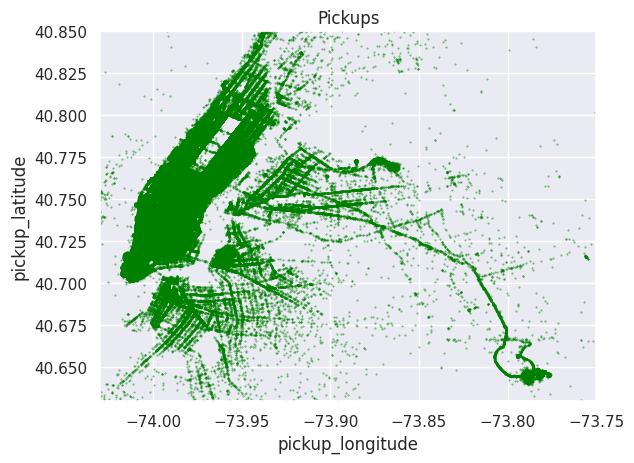

In [33]:
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63,40.85]

nyc_df.plot(kind='scatter', x='pickup_longitude',y='pickup_latitude',
          color='green',
          s=0.2, alpha =.6)
plt.title('Pickups')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [34]:
def select_within_boundingbox(df, BB):
    return ((nyc_df["pickup_longitude"] >= BB[0]) & (nyc_df["pickup_longitude"] <= BB[1]) & 
            (nyc_df["pickup_latitude"] >= BB[2]) & (nyc_df["pickup_latitude"] <= BB[3]) &
            (nyc_df["dropoff_longitude"] >= BB[0]) & (nyc_df["dropoff_longitude"] <= BB[1]) &
            (nyc_df["dropoff_latitude"] >= BB[2]) & (nyc_df["dropoff_latitude"] <= BB[3]))
BB = (-74.3, -73.0, 40.6, 41.7)

##### 1. Why did you pick the specific chart?

This particular chart type (scatter plot on a map) is best for visualizing geographic data like latitude and longitude coordinates. It allows us to visually represent the location of the pickups on a map of the US.

##### 2. What is/are the insight(s) found from the chart?

The visualization code provides a scatter plot on a map of the US, with each point representing a dropoff location of a taxi in NYC. The red dots represent the dropoff locations, and we can use this visualization to answer the questions posed in the information provided. Specifically, we can see if all pickups are constrained to NYC and its surrounding areas, if there are any unusual pickup locations, and if the latitude and longitude coordinates are constrained to the land area of the US.

#### Chart - 8

***Folium***

  - Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via folium.

- Concepts:
   folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.

In [35]:
import folium   

In [36]:
nyc = folium.Map(location=[40.730610,-73.935242],zoom_start=12, control_scale=True)
nyc

In [37]:
for i in nyc_df.index[:100]:
  folium.Marker(location=[nyc_df['pickup_latitude'][i],nyc_df['pickup_longitude'][i]],icon=folium.Icon(color="blue")).add_to(nyc)
nyc

In [38]:
for i in nyc_df.index[:100]:
  folium.Marker(location=[nyc_df['dropoff_latitude'][i],nyc_df['dropoff_longitude'][i]],icon=folium.Icon(color="red", icon="info-sign")).add_to(nyc)
nyc

##### 1. Why did you pick the specific chart?

This particular chart type (interactive map) is best for visualizing geographic data such as latitude and longitude coordinates of pickup and dropoff locations in this case. The markers on the map make it easy to identify patterns in the data and to see the distribution of the pickups and dropoffs across the city.

##### 2. What is/are the insight(s) found from the chart?

The visualization code provides insights into the geographic distribution of taxi pickups and dropoffs in New York City. By looking at the markers on the map, we can see that most pickups and dropoffs are concentrated in the central area of the city, with fewer pickups and dropoffs in the outer areas. We can also see that there are some pickups and dropoffs in unusual locations, such as near the airports or outside the main city area.

 ### FEATURE ENGINEERING AND VISUALIZATION OF MORE CHARTS

Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

In [39]:
#Calculate and assign new columns to the dataframe such as pickupday,
#dropoffday which will help us to gain more insights from the data.
nyc_df['pickup_day']=nyc_df['pickup_datetime'].dt.day_name()
nyc_df['dropoff_day']=nyc_df['dropoff_datetime'].dt.day_name()
nyc_df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_day dropoff_day  
0         40.765602                  N            455     Monday      Monday  
1         40.731152                  N            663     Sunday      Sunday  
2         40.710087                  N           2124    Tuesday     Tuesday  
3         40.706718                  N            429  Wednesday   Wednesday  
4         40.782520                  N            435   Saturday    Saturday

#### Chart - 9

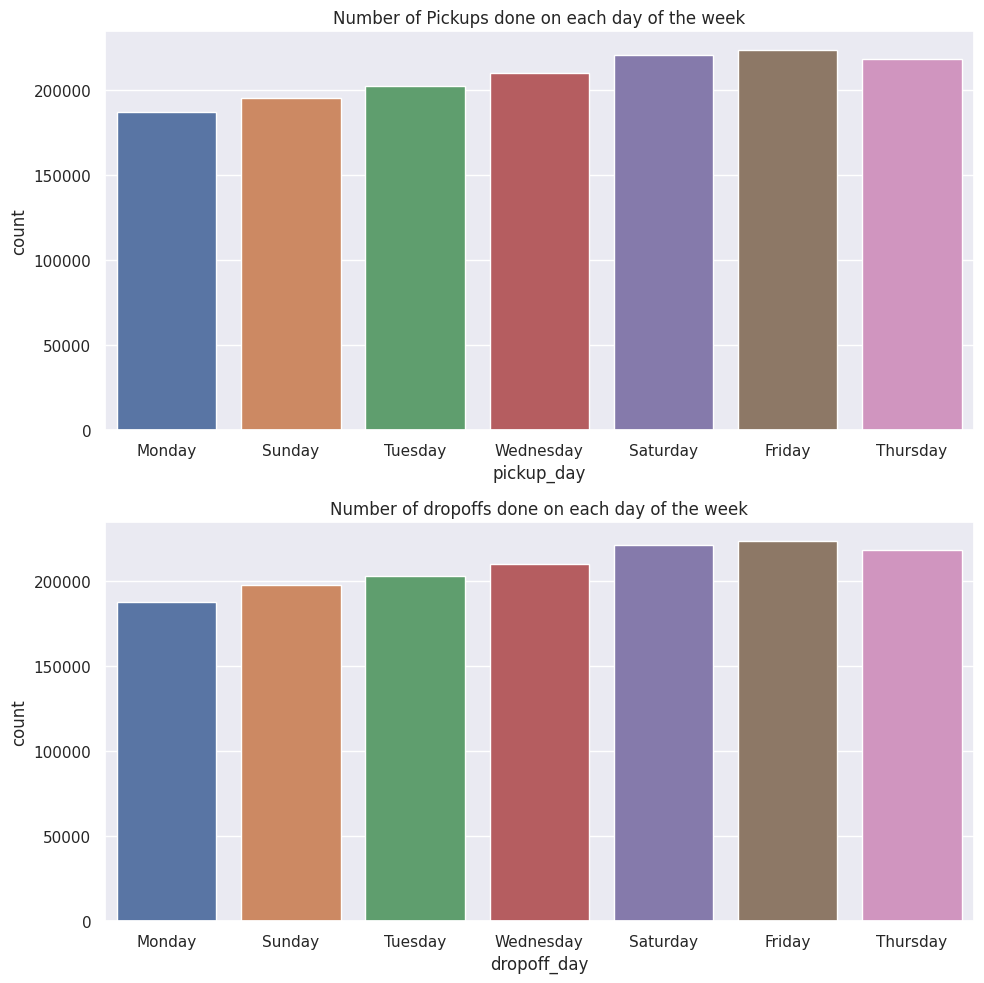

In [40]:
# Chart - 9 visualization code
#Number of Pickups and Dropoff on each day of the week
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=nyc_df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=nyc_df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

The chart type used in the given code is a count plot, which is best suited for displaying the frequency of occurrence of categorical data. In this case, the count plot is used to show the number of pickups and dropoffs on each day of the week. A count plot is a good choice here as the data is categorical and we want to know the number of occurrences for each category.

##### 2. What is/are the insight(s) found from the chart?

The visualization code provides insights into the number of pickups and dropoffs that occur on each day of the week. The plot shows that Friday is the day with the highest number of pickups and dropoffs, while Monday has the lowest number. This information can be useful in understanding the demand for taxi services on different days of the week, and can help in planning and scheduling of taxi services accordingly. The code also mentions that the distribution of trip duration with the days of the week is something to look into, but this is not visualized in the given code snippet.

Answer Here

#### Chart - 10

In [41]:
bins=np.array([0,1800,3600,5400,7200,90000])
nyc_df['duration_time']=pd.cut(nyc_df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

In [42]:

import datetime
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
nyc_df['pickup_timezone']=nyc_df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
nyc_df['dropoff_timezone']=nyc_df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

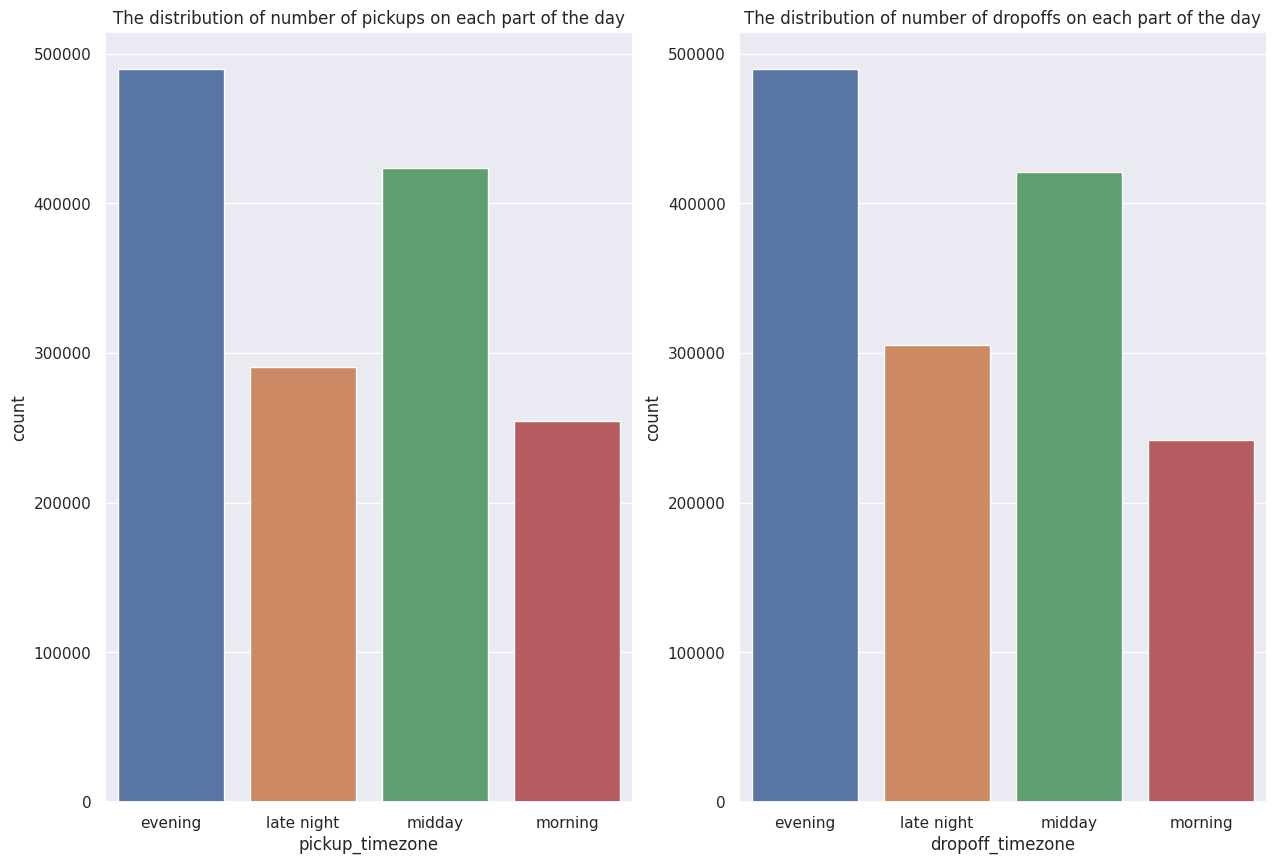

In [43]:
# Distribution of the no of Pickups and Dropoffs in a day
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,10))
sns.countplot(x='pickup_timezone',data=nyc_df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=nyc_df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

In [44]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates using Haversine formula.
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [45]:
#Calculate distance and assign new column to the dataframe.
nyc_df["distance"] = nyc_df.apply(lambda x: calc_distance(x),axis=1)

##### 1. Why did you pick the specific chart?

The chart type used in the given code is a count plot, which is best suited for displaying the frequency of occurrence of categorical data. In this case, the count plot is used to show the distribution of the number of pickups and dropoffs in different parts of the day. A count plot is a good choice here as the data is categorical and we want to know the number of occurrences for each category.

##### 2. What is/are the insight(s) found from the chart?

The visualization code provides insights into the distribution of the number of pickups and dropoffs in different parts of the day. The plot shows that the highest number of pickups and dropoffs occur in the evening, followed by the afternoon, morning, and then the late night. This information can be useful in understanding the demand for taxi services at different times of the day, and can help in planning and scheduling of taxi services accordingly. The code also mentions the parts of the day as "pickup_timezone" and "dropoff_timezone", which suggest that the data may have been preprocessed or transformed to group the pickup and dropoff times into different parts of the day.

#### Chart - 11

###### Outlier Detection using IQR Method


IQR=Q3-Q1

lower_limit_outlier=Q1-1.5*IQR

upper_limit_outlier=Q3+1.5*IQR¶

so we have to take the values which is greater then lower limit outlier and less then upper limit outlier
remove the outlier present in distance

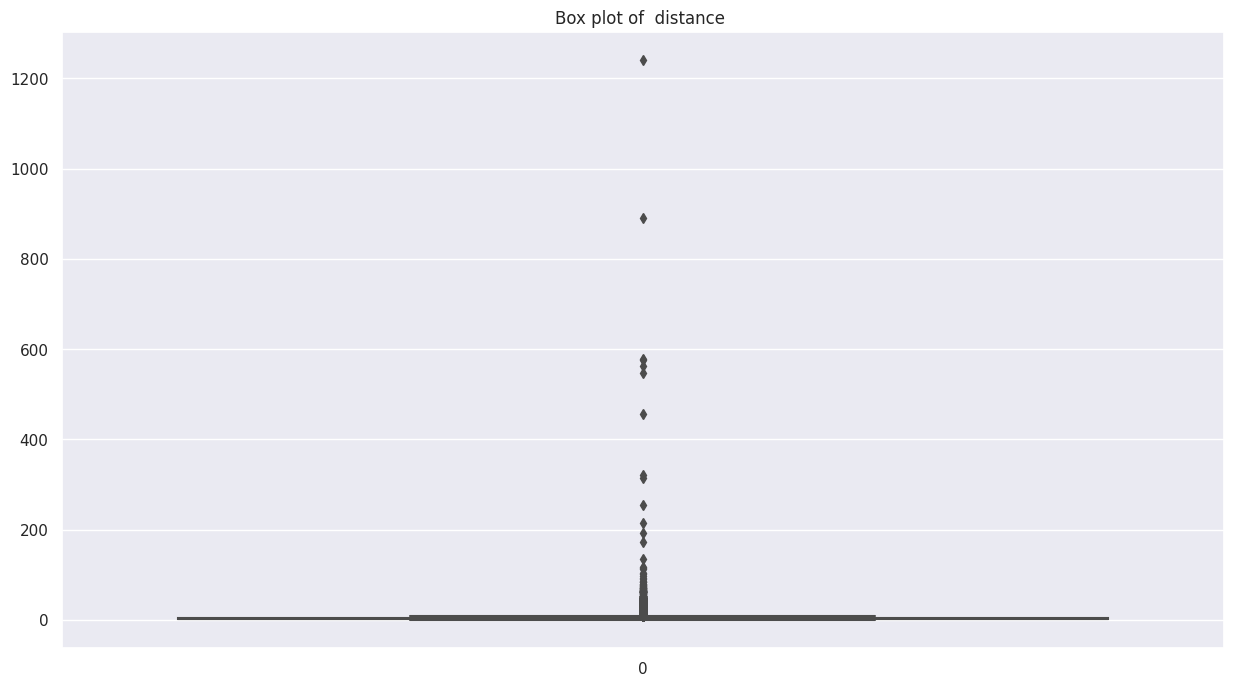

In [46]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  distance ")
ax = sns.boxplot(data=nyc_df['distance'], orient="v")

In [47]:
percentile_q1 = np.percentile(nyc_df['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(nyc_df['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(nyc_df['distance'],75)
print(percentile_q3)

1.2319108384989683
2.0937848447236194
3.875450446022868


In [48]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.7333985727868804
Upper limit for outlier  : 7.840759857308717


In [49]:
nyc_df=nyc_df[nyc_df['distance']>lower_limit_outlier]
nyc_df=nyc_df[nyc_df['distance']<upper_limit_outlier]

In [50]:
nyc_df.shape

(1317917, 17)

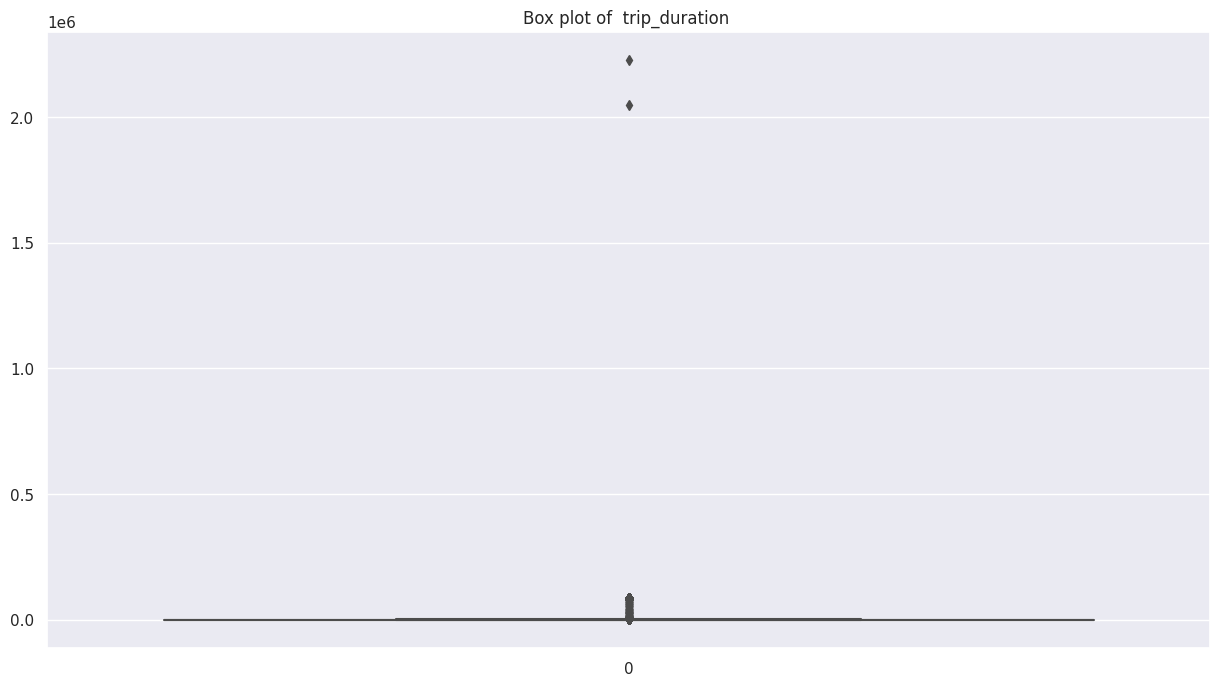

In [51]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  trip_duration ")
ax = sns.boxplot(data=nyc_df['trip_duration'], orient="v")

In [52]:
percentile_q1_trip_duration = np.percentile(nyc_df['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(nyc_df['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(nyc_df['trip_duration'],75)
print(percentile_q3_trip_duration)

373.0
605.0
931.0


In [53]:

iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)

lower limit for outlier  : -464.0
Upper limit for outlier  : 1768.0


In [54]:

nyc_df=nyc_df[nyc_df['trip_duration']>0]
nyc_df=nyc_df[nyc_df['trip_duration']<upper_limit_outlier_trip_duration]

In [55]:
nyc_df.shape

(1277345, 17)

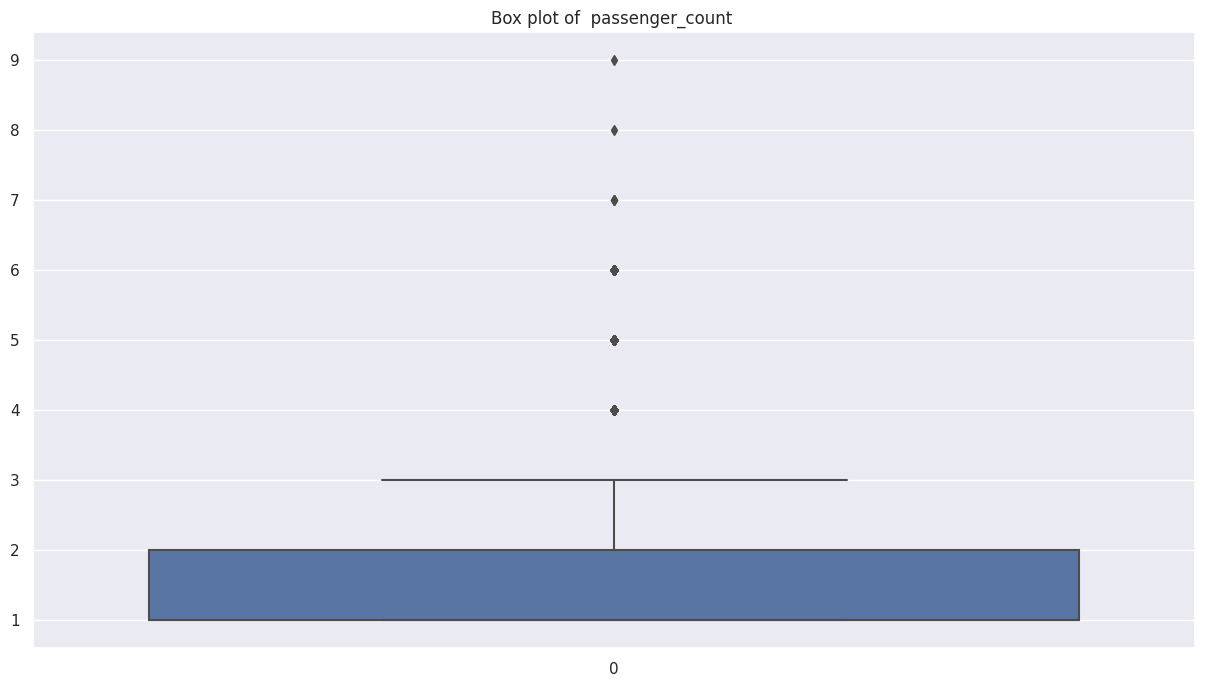

In [56]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  passenger_count ")
ax = sns.boxplot(data=nyc_df['passenger_count'])

In [57]:
percentile_q1_passenger_count = np.percentile(nyc_df['passenger_count'],25)
print(percentile_q1_passenger_count)
percentile_q2_passenger_count = np.percentile(nyc_df['passenger_count'],50)
print(percentile_q2_passenger_count)
percentile_q3_passenger_count = np.percentile(nyc_df['passenger_count'],75)
print(percentile_q3_passenger_count)

1.0
1.0
2.0


In [58]:
iqr=percentile_q3_passenger_count - percentile_q1_passenger_count
lower_limit_outlier_passenger_count=percentile_q1_passenger_count-1.5*iqr
upper_limit_outlier_passenger_count=percentile_q3_passenger_count+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_passenger_count)
print("Upper limit for outlier  :",upper_limit_outlier_passenger_count)

lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


In [59]:

nyc_df=nyc_df[nyc_df['passenger_count']>0]
nyc_df=nyc_df[nyc_df['passenger_count']<upper_limit_outlier_passenger_count]

In [60]:
nyc_df.shape

(1142605, 17)

In [61]:
#convert dattime in "%Y-%m-%d %H:%M:%S" format
nyc_df["pickup_datetime"] = pd.to_datetime(nyc_df["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")

In [62]:
nyc_df['Day']=nyc_df['pickup_datetime'].dt.day_name()

In [63]:
#Calculate and assign new columns to the dataframe such as year,
#month ,day_num,hour and minute which will help us to gain more insights from the data.
nyc_df["year"] = nyc_df["pickup_datetime"].apply(lambda x: x.year)
nyc_df["month"] = nyc_df["pickup_datetime"].apply(lambda x: x.month)
nyc_df["day_num"] = nyc_df["pickup_datetime"].apply(lambda x: x.day)
nyc_df["hour"] = nyc_df["pickup_datetime"].apply(lambda x: x.hour)
nyc_df["minute"] = nyc_df["pickup_datetime"].apply(lambda x: x.minute)

In [64]:
nyc_df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   
7  id1324603          2 2016-05-21 07:54:58 2016-05-21 08:20:49   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
7                1        -73.969276        40.797779         -73.922470   

   dropoff_latitude store_and_fwd_flag  ...  duration_time pickup_timezone  \
0         40.765602                  N  ...            < 5         evening   
1         40.731152                  N  ...            < 5      late night   
3         40.706718                  N  ...            < 5         evening   
4         40.782520                  N  ...            < 5          midday   
7         40.760559                  N  ...            < 5         morning   

  dropoff_timezone  distance        Day  year  month day_num  hour  minute  
0          evening  1.498523     Monday  2016      3      14    17      24  
1       late night  1.805510     Sunday  2016      6      12     0      43  
3          evening  1.485500  Wednesday  2016      4       6    19      32  
4           midday  1.188590   Saturday  2016      3      26    13      30  
7          morning  5.714989   Saturday  2016      5      21     7      54  

[5 rows x 23 columns]

Converting trip duration into hours.

Taking log of our distance for normalisation of data.

Taking log of our trip duration as well to normalize it's data too.

In [65]:
nyc_df['trip_duration_hour']=nyc_df['trip_duration']/3600
nyc_df['log_distance']=np.log(nyc_df.distance)
nyc_df['log_trip_duration']=np.log(nyc_df.trip_duration_hour)

<Axes: xlabel='vendor_id', ylabel='count'>

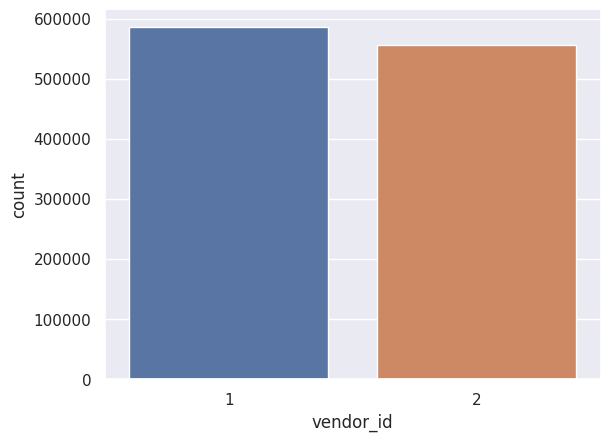

In [66]:
#Distribution of the vendor id for the taxi trip
sns.countplot(x='vendor_id',data=nyc_df)

Though both the vendors seems to have almost equal market share. But Vendor 1 is evidently more famous among the population as per the above graph.

In [67]:
#Dummify all the categorical features like "store_and_fwd_flag, Day" except the label i.e. "trip_duration"
nyc_df= pd.get_dummies(nyc_df, columns=["store_and_fwd_flag", "Day"], prefix=["store_and_fwd_flag",'Day'])

In [68]:
#Feature for the Machine learning models
features=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday']

In [69]:
newdata=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday','trip_duration_hour']
trip_data=nyc_df[newdata]

In [70]:
nyc_df.shape

(1142605, 33)

#### Split Data

Lets split our data first before scaling the features

In [71]:
#For Standarization  apply z-score
from scipy.stats import zscore
#Train test split
X = nyc_df[features].apply(zscore)[:100000]
y=nyc_df['trip_duration_hour'][:100000]

In [72]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(80000, 19) (80000,)
(20000, 19) (20000,)


#### Chart - 14 - Correlation Heatmap

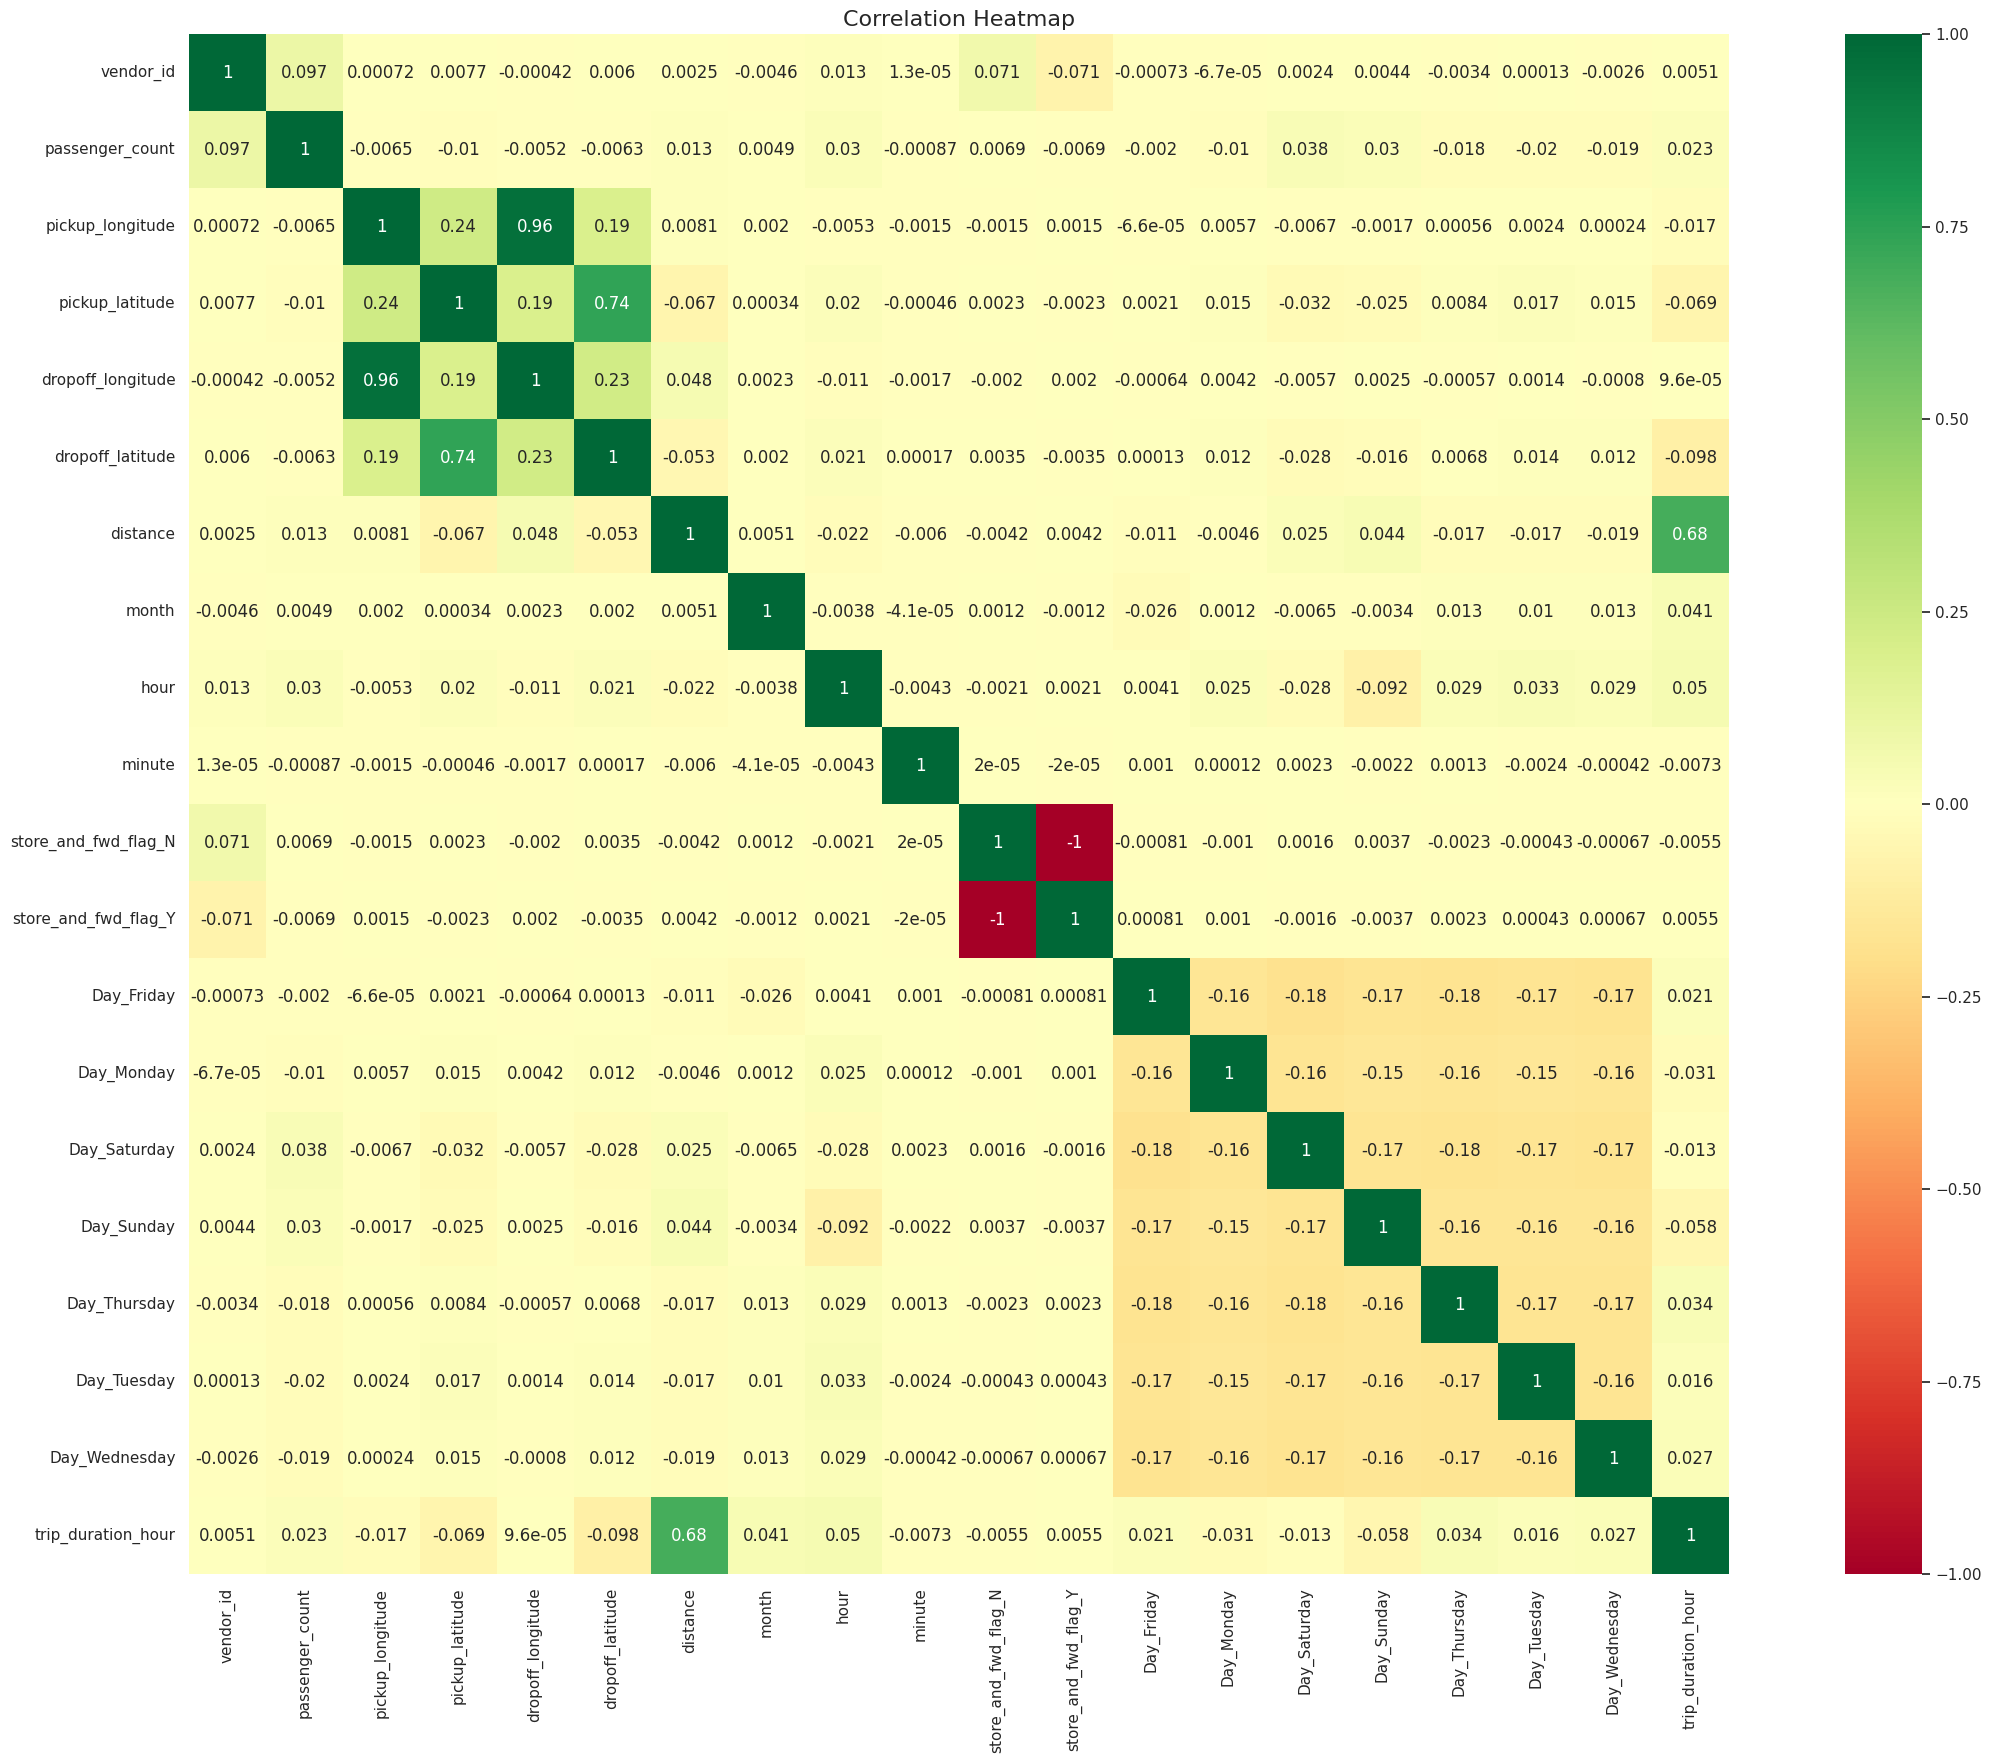

In [75]:
# Correlation Heatmap visualization code
plt.figure (figsize= (30,20))

sns.heatmap(trip_data.corr(), cmap='RdYlGn', annot=True,vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps are an effective way to display correlation matrices as they use color to represent the strength and direction of the relationship between variables. The heatmap is the best choice of visualization for this dataset because it allows for easy identification of strong positive and negative correlations between the variables. Additionally, the square=True parameter ensures that the heatmap is a square matrix, which is appropriate for visualizing correlation matrices.

##### 2. What is/are the insight(s) found from the chart?

he heatmap generated by the code provides insights into the correlation between different variables in trip_data. The colors in the heatmap represent the strength and direction of the correlation between the variables, with red indicating a positive correlation, green indicating a negative correlation, and yellow indicating no correlation. The annotations in the heatmap provide the exact correlation coefficient values, which help in understanding the degree of correlation between the variables. The visualization can help to identify which variables are strongly correlated with each other, which can provide insights into the relationships between different aspects of the dataset.

## ***7. ML Model Implementation***

The following code defines a function named EvaluationMetric() which takes in the true values, predicted values, and feature matrix and calculates various evaluation metrics for regression. Additionally, the function generates a plot of the actual and predicted values of the target variable for the first 100 records. This function is useful in evaluating the performance of regression models and can help in selecting the best model for a given problem

In [76]:
from matplotlib import legend
# Function for evaluation metric for regression
def EvaluationMetric(Xt,yt,yp,disp="on"):
  ''' Take the different set of parameter and prints evaluation metrics '''
  MSE=round(mean_squared_error(y_true=yt,y_pred=yp),4)
  RMSE=(np.sqrt(MSE))
  R2=(r2_score(y_true=yt,y_pred=yp))
  Adjusted_R2=(1-(1-r2_score(yt, yp))*((Xt.shape[0]-1)/(Xt.shape[0]-Xt.shape[1]-1)))
  if disp=="on":
    print("MSE :",MSE,"RMSE :", RMSE)
    print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((yp)[:100]) 
  plt.plot((np.array(yt)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')


  
  return (MSE,RMSE,R2,Adjusted_R2) 


### ML Model - 1 (Linear Regression)

In [87]:
# Instance the linear regression object
reg = LinearRegression().fit(X_train, y_train)

In [88]:
reg.score(X_train, y_train)

0.4976866213825779

In [89]:
y_pred_train = reg.predict(X_train)

In [90]:
y_pred_test = reg.predict(X_test)

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.4976866213825779 Adjusted R2 : 0.49756729212284134


(0.0055, 0.07416198487095663, 0.4976866213825779, 0.49756729212284134)

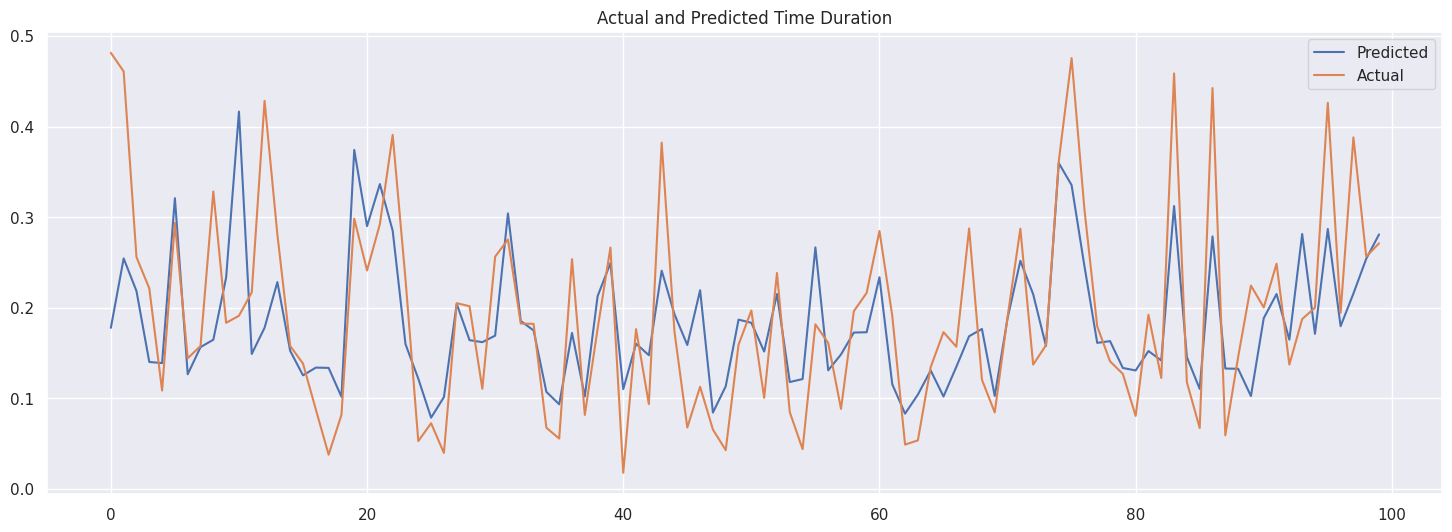

In [91]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_train)



MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.4957624675664867 Adjusted R2 : 0.49528296240551395


(0.0055, 0.07416198487095663, 0.4957624675664867, 0.49528296240551395)

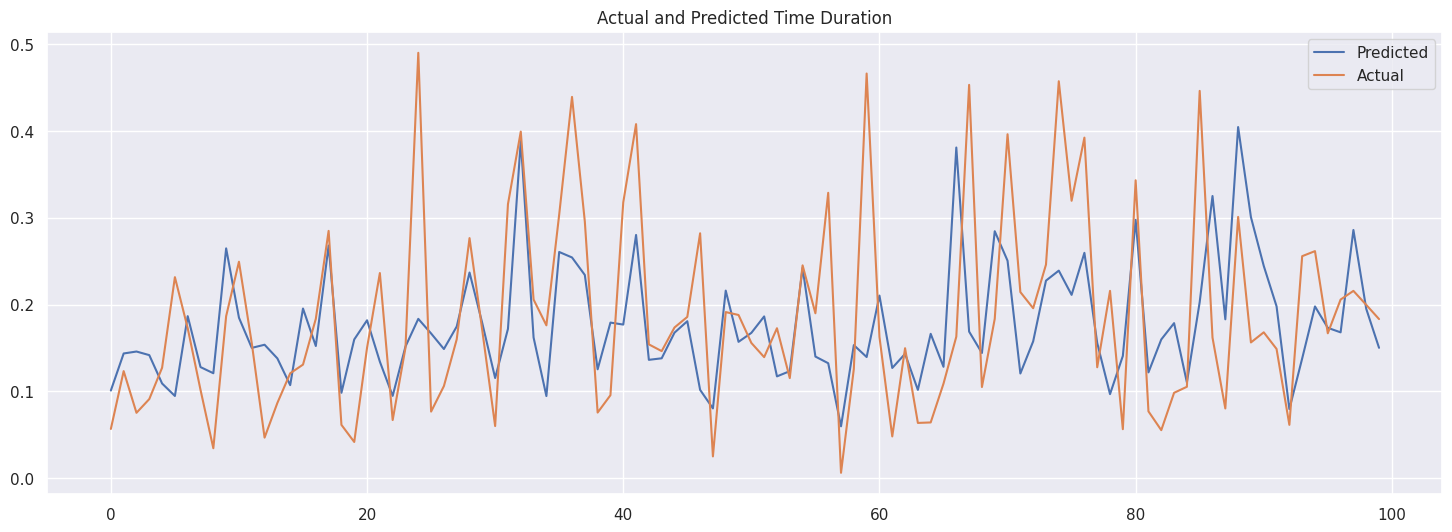

In [92]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_test)

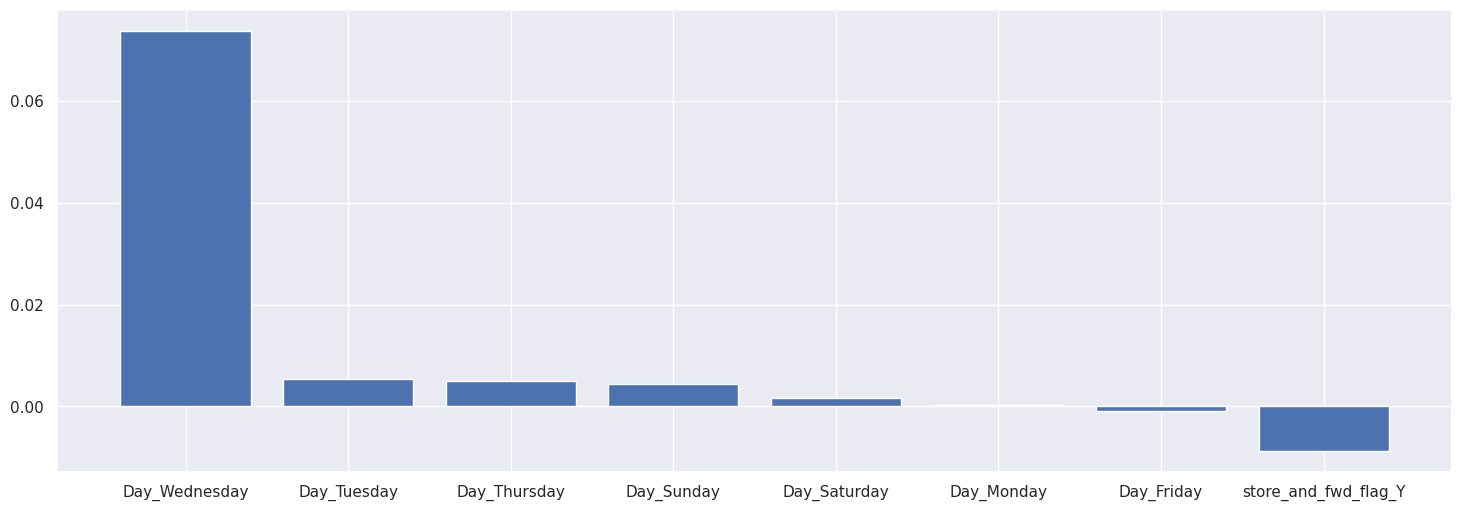

In [93]:
#Feature Importances for Linear Regression

plt.figure(figsize=(18,6))

importance=reg.coef_
importance=np.sort(importance)
feature=features
indices=np.argsort(importance)
indices=indices[:10:-1]
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)),[feature[i] for i in indices])
plt.show()

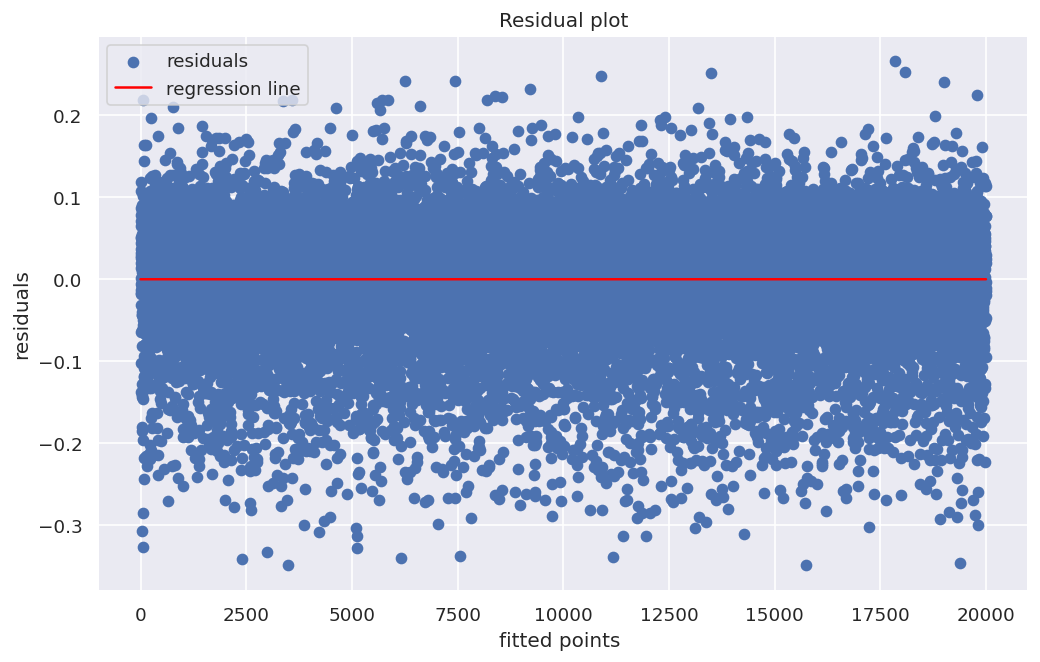

In [94]:
residuals=y_pred_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

### ML Model - 2 (Descision Tree)

In [95]:
# Maximum depth of trees
max_depth = [4,6,8,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20,30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,16,20]

# HYperparameter Grid
param_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [96]:
dt_model = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt_model,
                       param_grid = param_dt,
                       cv = 5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   0.2s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 16, 20],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [97]:
dt_grid.best_score_

0.6085952058609337

In [98]:
dt_grid.best_score_

0.6085952058609337

In [99]:
dt_grid.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=30)

In [100]:
dt_optimal_model =dt_grid.best_estimator_

In [101]:

y_pred_dt_test=dt_optimal_model.predict(X_test)
y_pred_dt_train=dt_optimal_model.predict(X_train)

In [102]:

y_pred_dt_test=dt_optimal_model.predict(X_test)
y_pred_dt_train=dt_optimal_model.predict(X_train)

MSE : 0.0039 RMSE : 0.06244997998398398
R2 : 0.6437001193563989 Adjusted R2 : 0.6436154769741506


(0.0039, 0.06244997998398398, 0.6437001193563989, 0.6436154769741506)

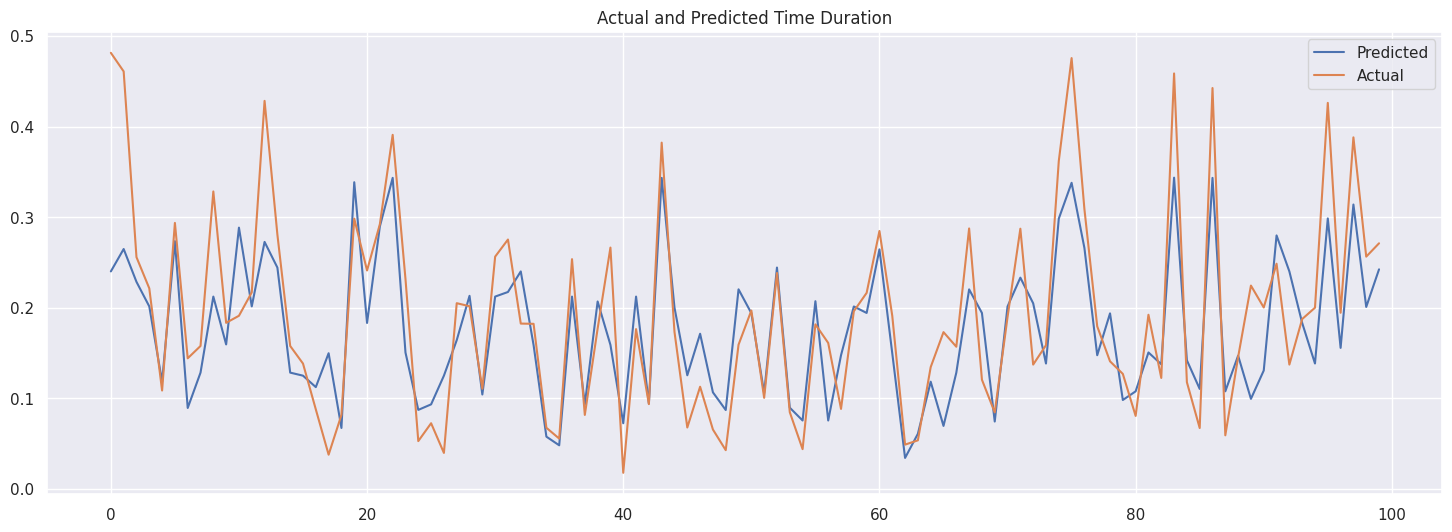

In [103]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_dt_train)

MSE : 0.0042 RMSE : 0.0648074069840786
R2 : 0.609772634819681 Adjusted R2 : 0.6094015477356758


(0.0042, 0.0648074069840786, 0.609772634819681, 0.6094015477356758)

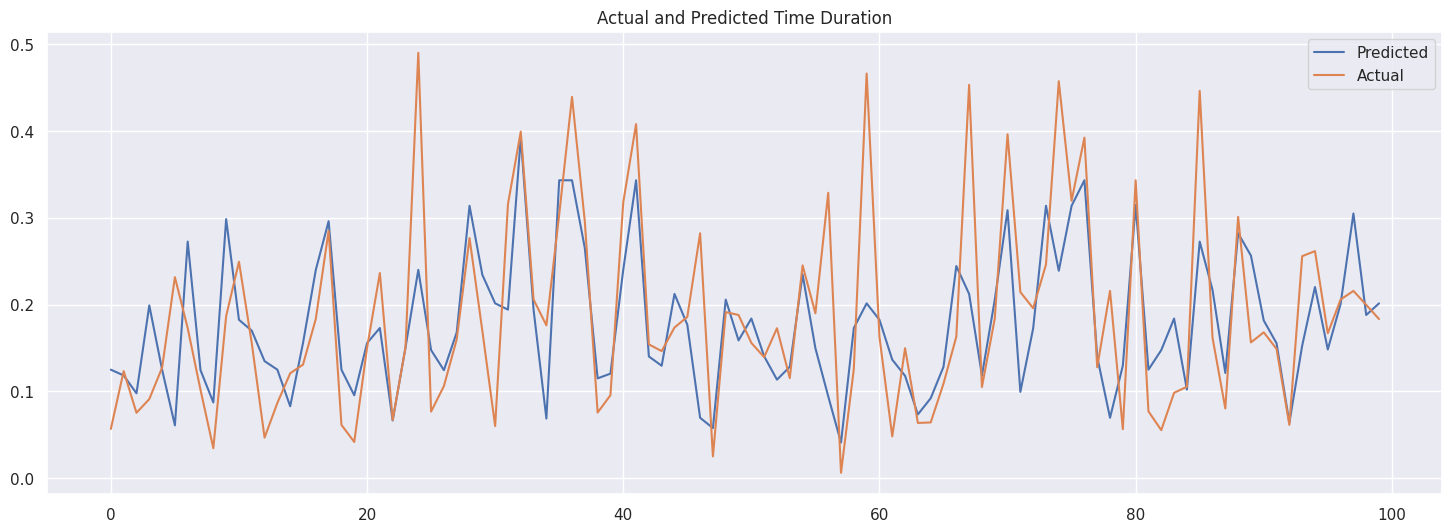

In [104]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_dt_test)

In [105]:
X_train.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance', 'month', 'hour',
       'minute', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'Day_Friday',
       'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday',
       'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')

In [106]:

dt_optimal_model.feature_importances_

array([9.38968142e-04, 4.43967868e-05, 9.01613757e-03, 4.52624602e-03,
       1.12006840e-02, 5.23422795e-02, 7.95299356e-01, 1.13750226e-03,
       9.12148562e-02, 1.38090212e-03, 0.00000000e+00, 0.00000000e+00,
       1.15545919e-03, 1.85697790e-03, 1.27165769e-02, 1.60198960e-02,
       7.31804693e-04, 1.33113813e-04, 2.84843170e-04])

In [107]:

importances = dt_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [108]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
6               distance            0.795299
8                   hour            0.091215
5       dropoff_latitude            0.052342
15            Day_Sunday            0.016020
14          Day_Saturday            0.012717
4      dropoff_longitude            0.011201
2       pickup_longitude            0.009016
3        pickup_latitude            0.004526
13            Day_Monday            0.001857
9                 minute            0.001381
12            Day_Friday            0.001155
7                  month            0.001138
0              vendor_id            0.000939
16          Day_Thursday            0.000732
18         Day_Wednesday            0.000285
17           Day_Tuesday            0.000133
1        passenger_count            0.000044
11  store_and_fwd_flag_Y            0.000000
10  store_and_fwd_flag_N            0.000000

<Axes: title={'center': 'Features importace'}, xlabel='Feature', ylabel='Feature Importance'>

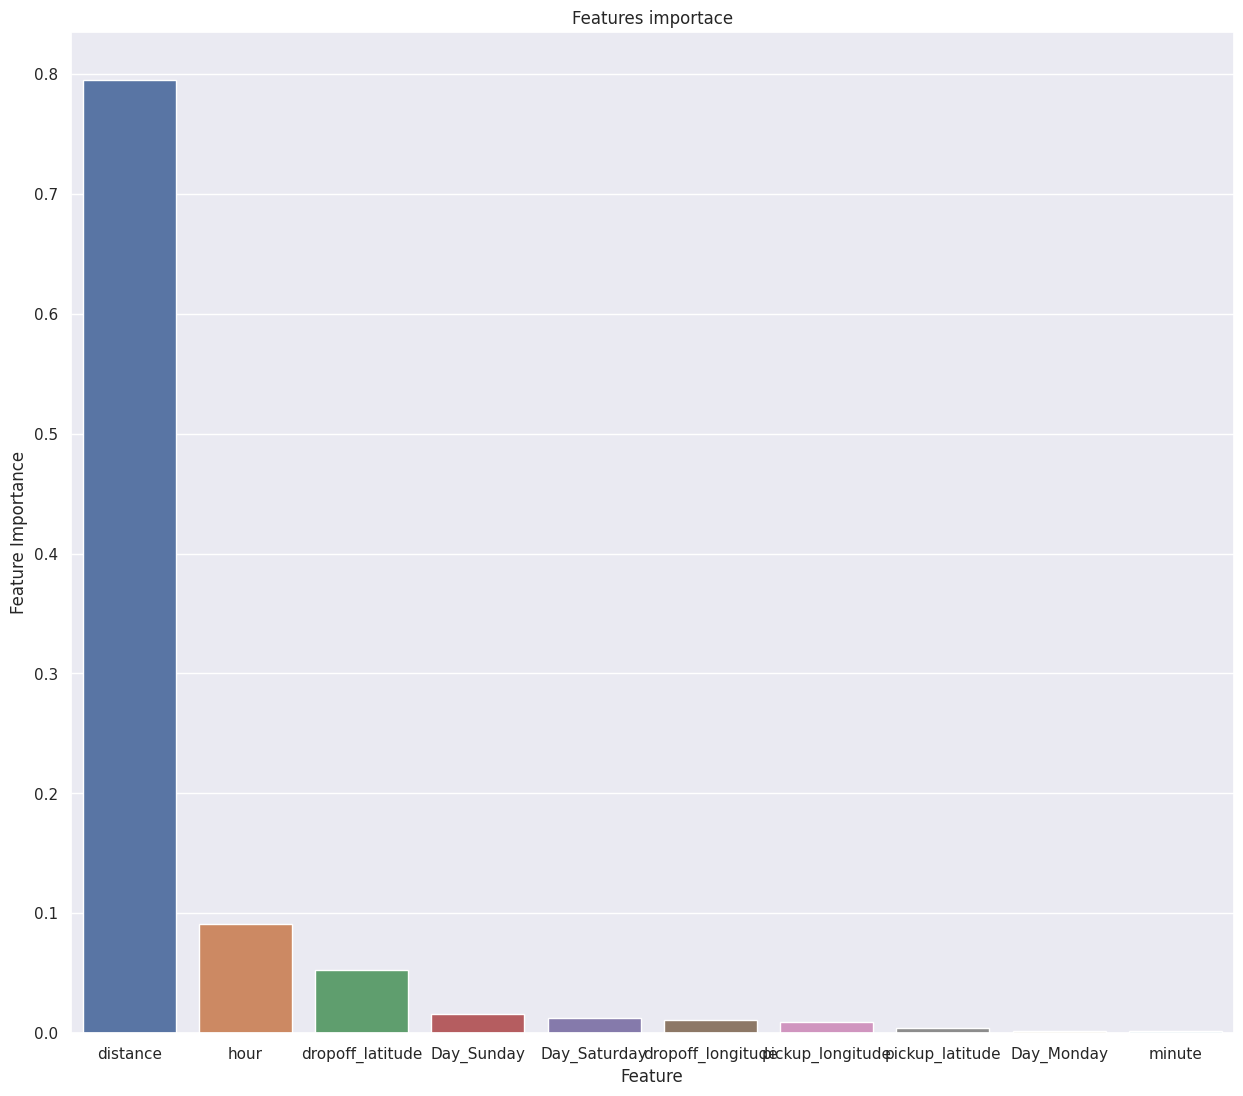

In [109]:
plt.figure(figsize=(15,13))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

In [110]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [111]:
graph = Source(tree.export_graphviz(dt_optimal_model, out_file=None,feature_names=X_train.columns, filled = True))
display(SVG(graph.pipe(format='svg')))  

### ML Model - 3 (XGBoost)

In [112]:
# Number of trees
n_estimators = [50,100,120]

# Maximum depth of trees
max_depth = [5,7,9]
min_samples_split = [40,50]
#learning_rate=[0.1,0.3,0.5]

# HYperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_split':min_samples_split
              }

In [113]:
# Create an instance of the  XGBRegressor
import xgboost as xgb
xgb_model = xgb.XGBRegressor()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_xgb,cv = 3, verbose=2,scoring="r2")

xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[04:23:41] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   4.2s
[04:23:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   3.4s
[04:23:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END .max_depth=5, min_samples_split=40, n_estimators=50; total time=   3.4s
[04:23:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END max_depth=5, min_samples_split=40, n_estimators=100; total time=   9.2s
[04:24:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[CV] END max_depth=5, min_samples_split=40, n_estimators=100; total time=   9.3s
[04:24:11] WARNING: ../src/learner.cc:767: 
Parameters: { "

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [5, 7, 9], 'min_samples_split': [40, 50],
                         'n_estimators': [50, 100, 120]},
             scoring='r2', verbose=2)

In [114]:
xgb_grid.best_score_

0.6976478004506999

In [115]:
xgb_grid.best_params_

{'max_depth': 7, 'min_samples_split': 40, 'n_estimators': 120}

In [116]:
xgb_optimal_model =xgb_grid.best_estimator_

In [117]:
y_pred_xgb_test=xgb_optimal_model.predict(X_test)
y_pred_xgb_train=xgb_optimal_model.predict(X_train)


MSE : 0.0021 RMSE : 0.0458257569495584
R2 : 0.8080231130954494 Adjusted R2 : 0.8079775071833315


(0.0021, 0.0458257569495584, 0.8080231130954494, 0.8079775071833315)

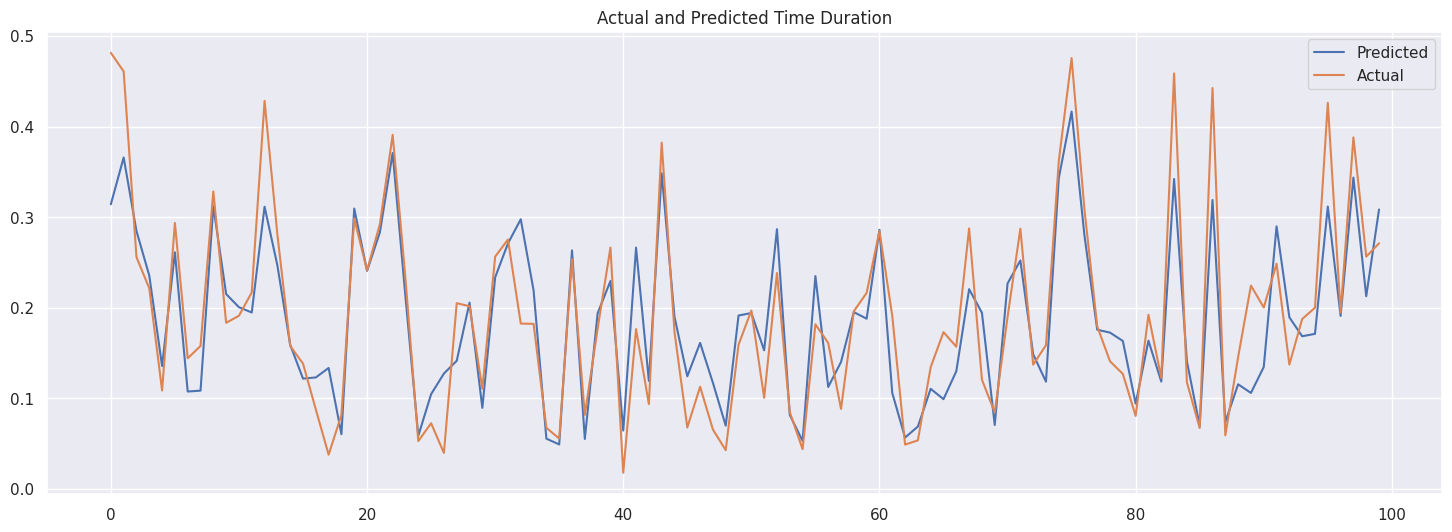

In [118]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_xgb_train)

MSE : 0.0032 RMSE : 0.0565685424949238
R2 : 0.7076042982746114 Adjusted R2 : 0.7073262443040016


(0.0032, 0.0565685424949238, 0.7076042982746114, 0.7073262443040016)

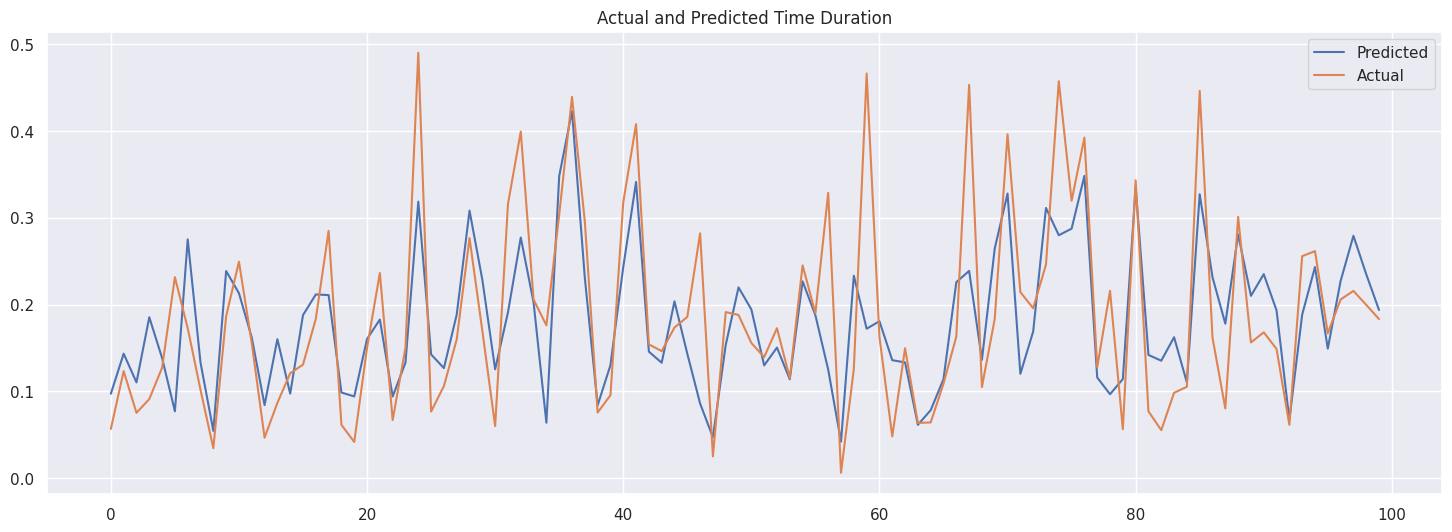

In [119]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_xgb_test)

In [120]:
X_train.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance', 'month', 'hour',
       'minute', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'Day_Friday',
       'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday',
       'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')

In [121]:
xgb_optimal_model.feature_importances_

array([0.0066098 , 0.00561689, 0.01981013, 0.01962079, 0.02375217,
       0.04059758, 0.42987415, 0.01631433, 0.08435066, 0.00992472,
       0.01040273, 0.        , 0.01883767, 0.05569108, 0.07762822,
       0.13028865, 0.0158135 , 0.02137746, 0.01348948], dtype=float32)

In [122]:
importances = xgb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [123]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
6               distance            0.429874
15            Day_Sunday            0.130289
8                   hour            0.084351
14          Day_Saturday            0.077628
13            Day_Monday            0.055691
5       dropoff_latitude            0.040598
4      dropoff_longitude            0.023752
17           Day_Tuesday            0.021377
2       pickup_longitude            0.019810
3        pickup_latitude            0.019621
12            Day_Friday            0.018838
7                  month            0.016314
16          Day_Thursday            0.015814
18         Day_Wednesday            0.013489
10  store_and_fwd_flag_N            0.010403
9                 minute            0.009925
0              vendor_id            0.006610
1        passenger_count            0.005617
11  store_and_fwd_flag_Y            0.000000

<Axes: title={'center': 'Features importace'}, xlabel='Feature', ylabel='Feature Importance'>

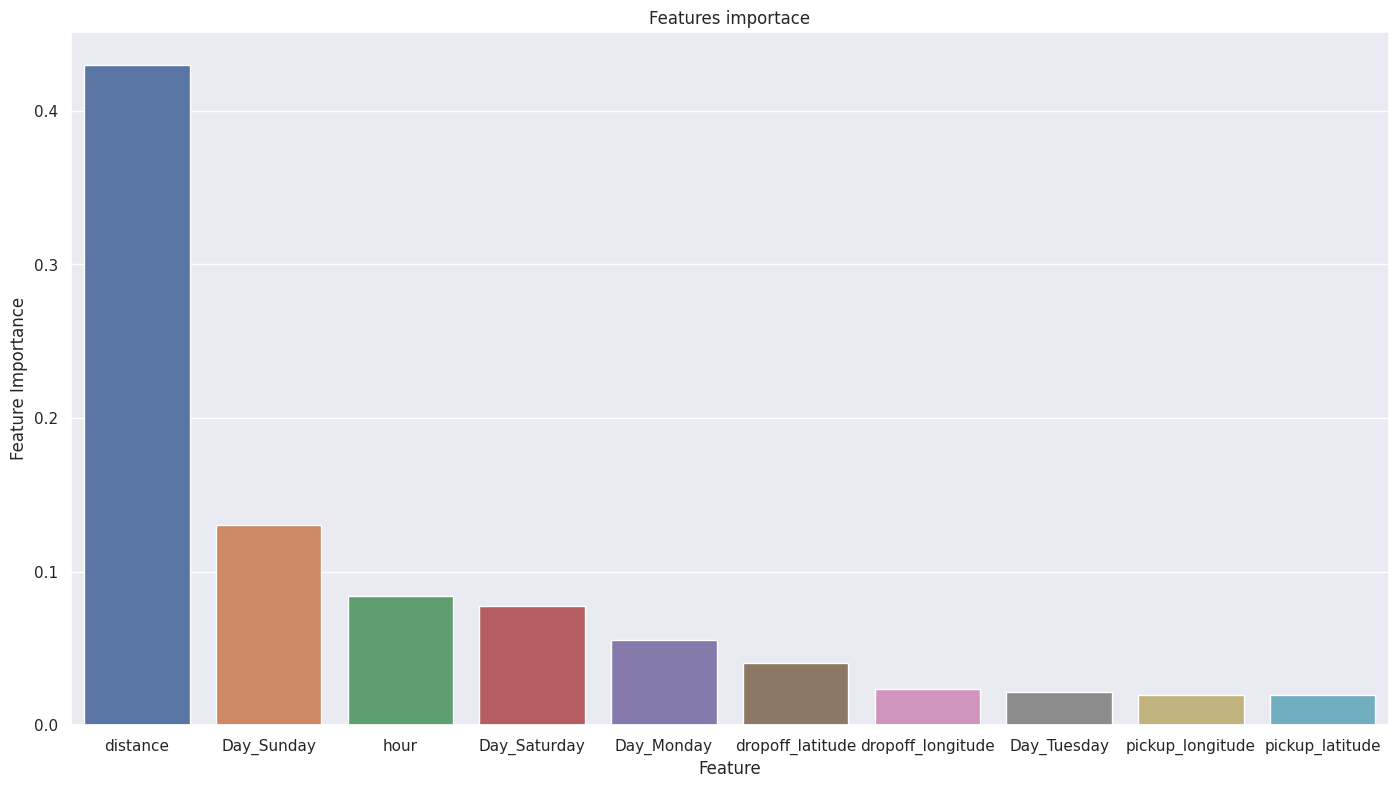

In [124]:
plt.figure(figsize=(17,9))
plt.title('Features importace')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

### ML Model - 4 (GradientBoosting)

In [125]:
# Number of trees
n_estimators = [100,120]

# Maximum depth of trees
max_depth = [5,8,10]

# Minimum number of samples required to split a node
min_samples_split = [50,80]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]


# HYperparameter Grid
param_gb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [126]:
# Create an instance of the  GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_gb,
                       cv = 3, verbose=2, scoring='r2')

gb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  26.0s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  26.5s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  26.0s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  31.1s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  32.0s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=  32.0s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=  26.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=  27.7s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time=  25.7s
[CV] END max_depth=5,

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 8, 10], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80],
                         'n_estimators': [100, 120]},
             scoring='r2', verbose=2)

In [127]:
gb_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 80,
 'n_estimators': 120}

In [128]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=10, min_samples_leaf=50,
                          min_samples_split=80, n_estimators=120)

In [129]:
gb_optimal_model = gb_grid.best_estimator_

In [130]:
y_preds_gb = gb_optimal_model.predict(X_test)
y_pred_gb_train=gb_optimal_model.predict(X_train)

MSE : 0.0023 RMSE : 0.04795831523312719
R2 : 0.7946145685424261 Adjusted R2 : 0.7945657773046455


(0.0023, 0.04795831523312719, 0.7946145685424261, 0.7945657773046455)

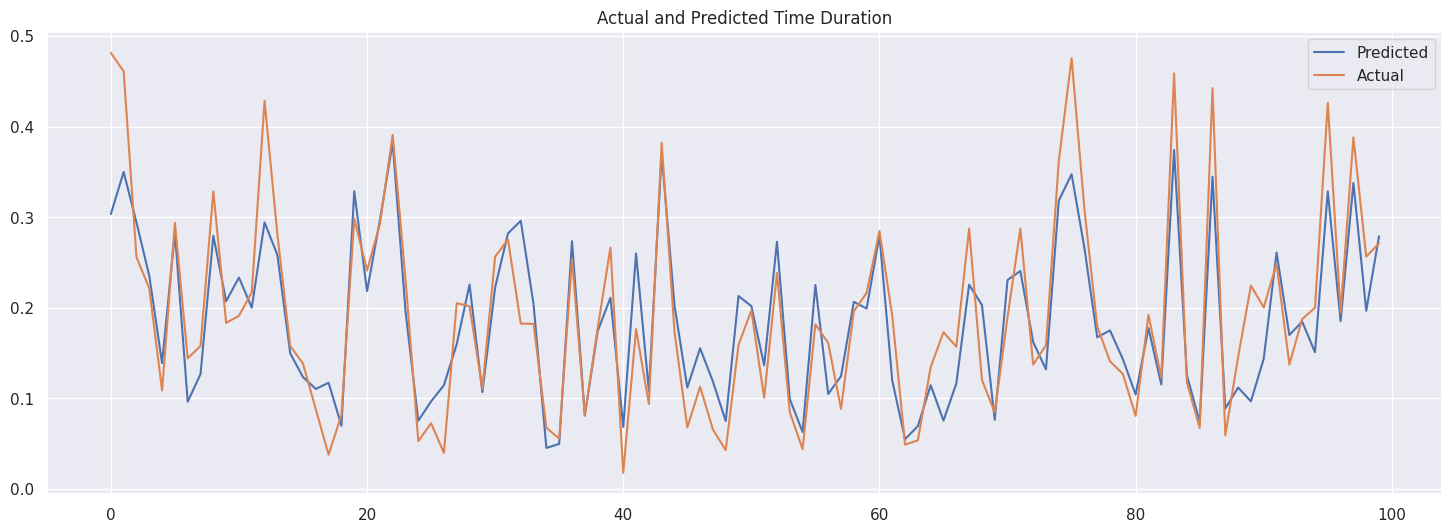

In [131]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_gb_train)

MSE : 0.0031 RMSE : 0.055677643628300216
R2 : 0.7124085549766 Adjusted R2 : 0.7121350696184697


(0.0031, 0.055677643628300216, 0.7124085549766, 0.7121350696184697)

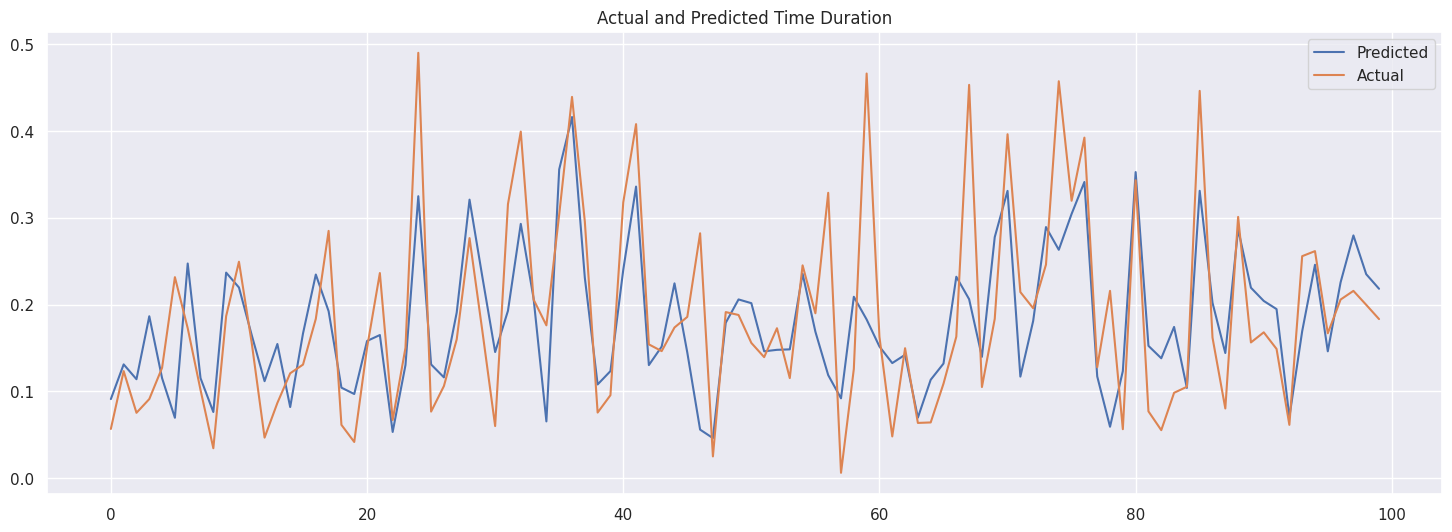

In [132]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_preds_gb)

In [133]:

xgb_optimal_model.feature_importances_

array([0.0066098 , 0.00561689, 0.01981013, 0.01962079, 0.02375217,
       0.04059758, 0.42987415, 0.01631433, 0.08435066, 0.00992472,
       0.01040273, 0.        , 0.01883767, 0.05569108, 0.07762822,
       0.13028865, 0.0158135 , 0.02137746, 0.01348948], dtype=float32)

In [134]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [135]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
6               distance            0.657715
8                   hour            0.089069
5       dropoff_latitude            0.074094
4      dropoff_longitude            0.044235
2       pickup_longitude            0.042387
3        pickup_latitude            0.034388
15            Day_Sunday            0.015044
14          Day_Saturday            0.013166
7                  month            0.008119
9                 minute            0.007355
13            Day_Monday            0.004189
12            Day_Friday            0.002055
0              vendor_id            0.001982
16          Day_Thursday            0.001969
18         Day_Wednesday            0.001802
17           Day_Tuesday            0.001761
1        passenger_count            0.000664
10  store_and_fwd_flag_N            0.000005
11  store_and_fwd_flag_Y            0.000000

<Axes: title={'center': 'Top 5 Features'}, xlabel='Feature', ylabel='Feature Importance'>

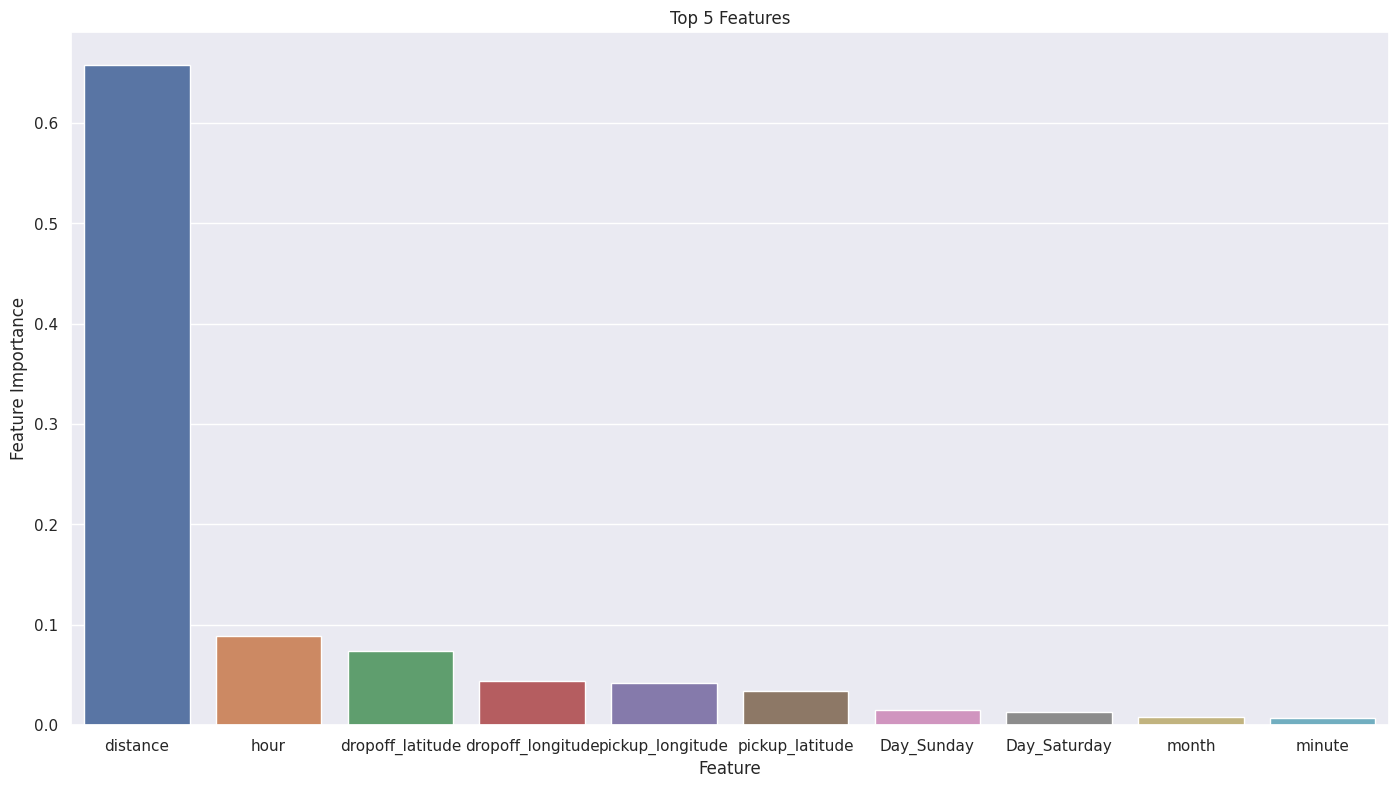

In [136]:
plt.figure(figsize=(17,9))
plt.title('Top 5 Features')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

### ML Model - 4 (Light GBM)

In [137]:
from lightgbm import LGBMRegressor

In [138]:
# Applying LightGBM
n_estimator=[5,10,20] # No. of tree
max_depth=[5,7,9] # max depth of tree
min_samples_split=[40,50]
params={"n_estimator":n_estimator,"max_depth":max_depth,"min_samples_split":min_samples_split}
lgb=LGBMRegressor()
gs_lgb=GridSearchCV(lgb,params,cv=3,verbose=2,scoring='r2')
gs_lgb.fit(X_train,y_train)
print(gs_lgb.best_score_)
print(gs_lgb.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   0.7s
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   0.7s
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV] END ...max_depth=5, min_samples_split=40, n_estimator=5; total time=   0.7s
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=10; total time=   0.7s
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV] END ..max_depth=5, min_samples_split=40, n_estimator=10; tot

In [139]:
gs_lgb.best_estimator_

LGBMRegressor(max_depth=9, min_samples_split=40, n_estimator=5)

In [140]:
gs_lgb_opt_model = gs_lgb.best_estimator_

In [141]:
y_preds_lgb = gs_lgb_opt_model.predict(X_test)
y_pred_lgb_train=gs_lgb_opt_model.predict(X_train)

MSE : 0.0033 RMSE : 0.05744562646538029
R2 : 0.7012762377478683 Adjusted R2 : 0.7012052731131748


(0.0033, 0.05744562646538029, 0.7012762377478683, 0.7012052731131748)

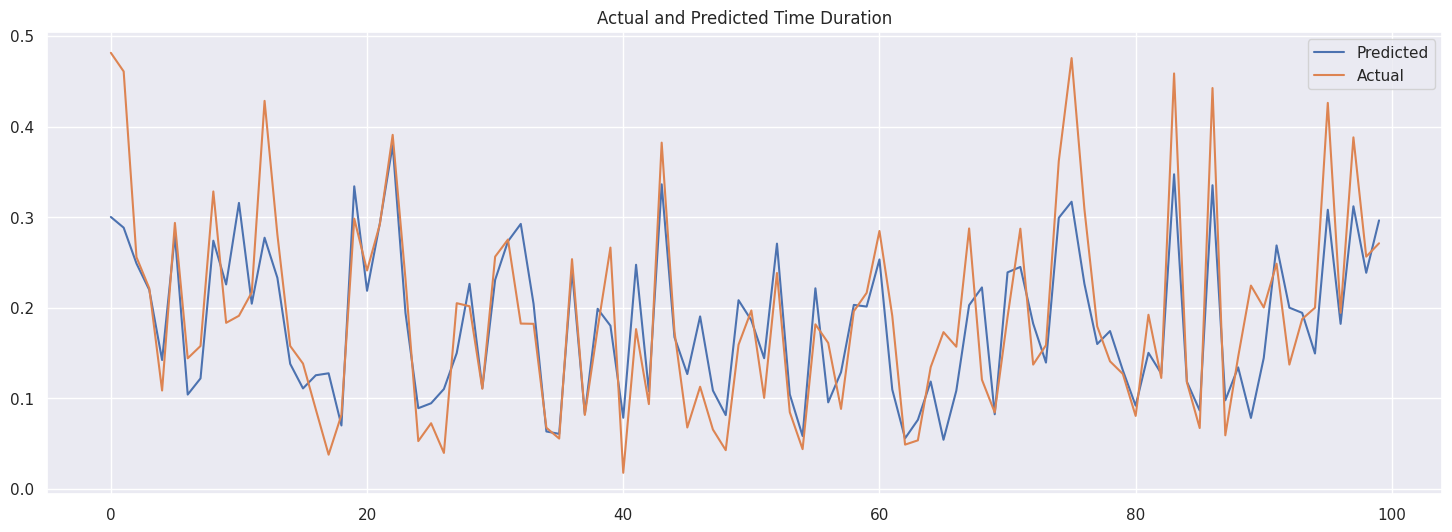

In [142]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_lgb_train)

MSE : 0.0034 RMSE : 0.058309518948453
R2 : 0.6850215927460219 Adjusted R2 : 0.6847220637301148


(0.0034, 0.058309518948453, 0.6850215927460219, 0.6847220637301148)

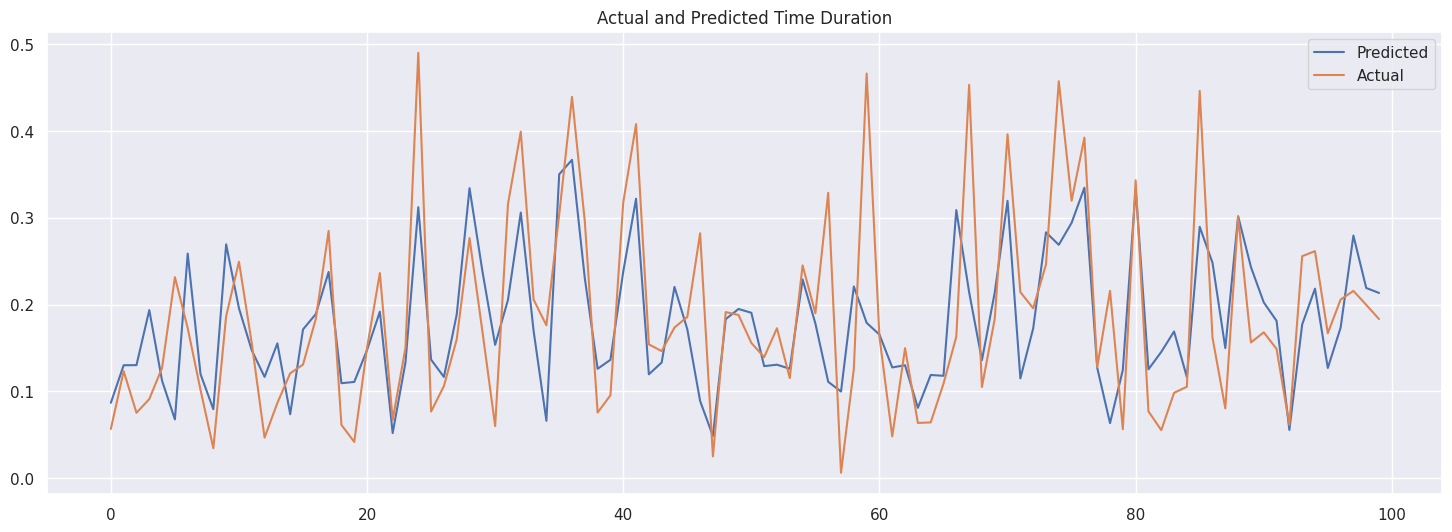

In [143]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_preds_lgb)

In [144]:
importances = gs_lgb_opt_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [145]:
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

Feature  Feature Importance
8                   hour                 503
5       dropoff_latitude                 497
4      dropoff_longitude                 402
2       pickup_longitude                 389
6               distance                 349
3        pickup_latitude                 331
14          Day_Saturday                 120
15            Day_Sunday                 100
7                  month                  81
13            Day_Monday                  55
9                 minute                  54
0              vendor_id                  28
17           Day_Tuesday                  24
12            Day_Friday                  21
16          Day_Thursday                  17
18         Day_Wednesday                  16
1        passenger_count                  13
11  store_and_fwd_flag_Y                   0
10  store_and_fwd_flag_N                   0

<Axes: title={'center': 'Top 5 Features'}, xlabel='Feature', ylabel='Feature Importance'>

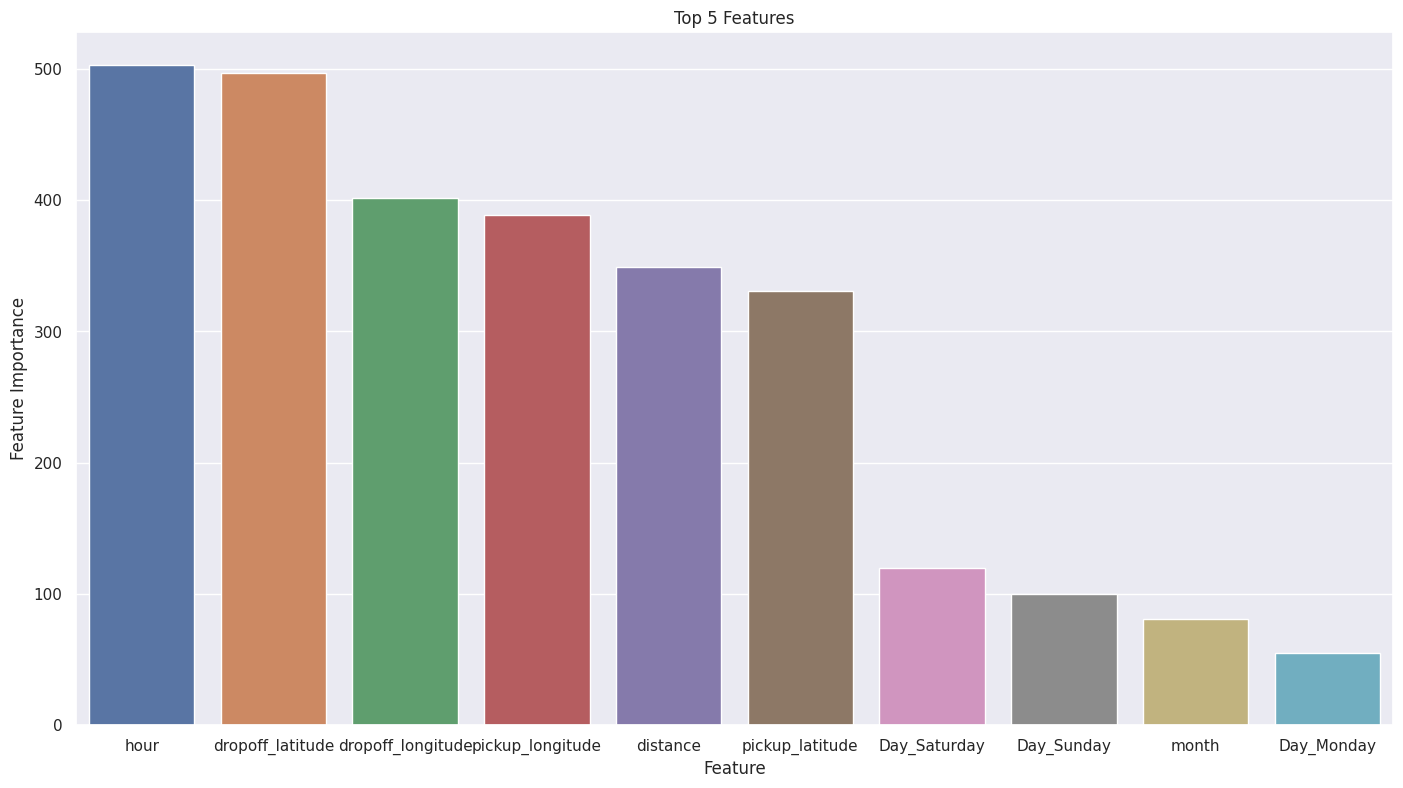

In [146]:
plt.figure(figsize=(17,9))
plt.title('Top 5 Features')
sns.barplot(x='Feature',y="Feature Importance",data=importance_df[:10])

###Model Performance

In [149]:
#Train data

from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])
train.add_row(['1','Linear Regression','0.0055473742826857575', '0.07448069738318619', '0.4975386610902135','0.49741929668112017'])
train.add_row(['4','DecisionTree Regressor','0.003933693284929908','0.0627191620234989','0.6437001193563989','0.6436154769741506'])
train.add_row(['5','XGBRegressor','0.001963513255289278','0.044311547651704496','0.8221519859766687','0.8221097365109717'])
train.add_row(['6','GradientBoosting','0.0022675373651197994','0.04761866614175369','0.7946145685424261','0.7945657773046455'])
train.add_row(['7','LightGBM','0.0032980298940813377','0.057428476334318135','0.7012762377478683','0.7012052731131748'])
print(train)

+-------+------------------------+-----------------------+----------------------+--------------------+---------------------+
| SL NO |       MODEL_NAME       |       Train MSE       |      Train RMSE      |     Train R^2      |  Train Adjusted R^2 |
+-------+------------------------+-----------------------+----------------------+--------------------+---------------------+
|   1   |   Linear Regression    | 0.0055473742826857575 | 0.07448069738318619  | 0.4975386610902135 | 0.49741929668112017 |
|   4   | DecisionTree Regressor |  0.003933693284929908 |  0.0627191620234989  | 0.6437001193563989 |  0.6436154769741506 |
|   5   |      XGBRegressor      |  0.001963513255289278 | 0.044311547651704496 | 0.8221519859766687 |  0.8221097365109717 |
|   6   |    GradientBoosting    | 0.0022675373651197994 | 0.04761866614175369  | 0.7946145685424261 |  0.7945657773046455 |
|   7   |        LightGBM        | 0.0032980298940813377 | 0.057428476334318135 | 0.7012762377478683 |  0.7012052731131748 |


In [150]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Test MSE", "Test RMSE",'Test R^2','Test Adjusted R^2'])
test.add_row(['1','Linear Regression','0.005472765706091576','0.07397814343501448','0.4957919161505717','0.495312438993758'])
test.add_row(['4','DecisionTree Regressor','0.004235598377226902','0.0650814749158845','0.609772634819681','0.6094015477356758'])
test.add_row(['5','XGBRegressor','0.0031445622329224813','0.056076396397436966','0.7102902292633624','0.7100147294813806'])
test.add_row(['6','GradientBoosting','0.003121489155427573','0.05587028866425851','0.7124159610810551',' 0.7121424827657667'])
test.add_row(['7','LightGBM','0.003418832582409957',' 0.058470784007142895','0.6850215927460219','0.6847220637301148'])
print(test)

+-------+------------------------+-----------------------+-----------------------+--------------------+---------------------+
| SL NO |       MODEL_NAME       |        Test MSE       |       Test RMSE       |      Test R^2      |  Test Adjusted R^2  |
+-------+------------------------+-----------------------+-----------------------+--------------------+---------------------+
|   1   |   Linear Regression    |  0.005472765706091576 |  0.07397814343501448  | 0.4957919161505717 |  0.495312438993758  |
|   4   | DecisionTree Regressor |  0.004235598377226902 |   0.0650814749158845  | 0.609772634819681  |  0.6094015477356758 |
|   5   |      XGBRegressor      | 0.0031445622329224813 |  0.056076396397436966 | 0.7102902292633624 |  0.7100147294813806 |
|   6   |    GradientBoosting    |  0.003121489155427573 |  0.05587028866425851  | 0.7124159610810551 |  0.7121424827657667 |
|   7   |        LightGBM        |  0.003418832582409957 |  0.058470784007142895 | 0.6850215927460219 |  0.68472206373

Hence we can conclude that Gradient boosting perform well.

## ***8.*** ***Future Work (Optional)***

 
 
 - To improve the model, we could add more training instances to improve the validation curve in the XGBoost model.
 - Another option is to increase the regularization for the learning algorithm, which would decrease the variance and increase the bias towards the validation curve.
 - We could also consider reducing the number of features in the training data that we currently use. This would still allow the algorithm to fit the training data well, but due to the decreased number of features, it would build less complex models. This should increase the bias and decrease the variance.

# **Conclusion**

 - The project covered various aspects of the machine learning development cycle.
 - Data exploration and variable analysis are essential parts of the cycle and should be conducted to achieve a comprehensive understanding of the data.
 - The data was cleaned during the exploration phase to handle outliers before feature engineering.
 - Feature engineering was carried out to extract optimal features that are significant and cover most of the variance in the dataset.
 - The models were trained on the optimum featureset to obtain the results.
 - The analysis indicates that the two models have similar learning rates, but with discernible differences in error rates.
 - Gradient boosting exhibits superior performance compared to all other models.
XGBoost's training curve shows a low initial error rate, which improves with an increase in training size and eventually plateaus towards the end.
 - The validation curves of both models follow a similar trend, with high initial error rates that progressively decrease as the training size increases, albeit with varying degrees of accuracy.
 - Both models exhibit high variance, as evidenced by their low training curve errors.
 - The significant gap observed towards the end suggests a low bias, indicating potential overfitting of the training data.
 - Both models have the potential to decrease further and converge towards the training curve by the end.



